<a href="https://colab.research.google.com/github/PandukaBandara99/ML-Books/blob/main/1%20Macine%20Learning%20Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br> UG @ Dpt. of Electronic & Electrical Engineering ;<br> University of Peradeniya ;<br> 2023/03 <br><br> Email : e19039@end.pdn.ac.lk <br> LinkedIN : https://www.linkedin.com/in/pandukabandara/


# 1 Supervised Machine Learning: Regression




## 1.1 Introduction

In supervised learning , learn begins from given correct data set of (feature,target) and the learning algorythem is used to identify the mapping function for those data set.

*   Regression : For continuous functions ,predicts numbers.
*   Classification : Predicts caegories ,Descrete outcomes.



Terminology

*   $x$  = "Input variables , called features
*   $y$  = "Output variables" , called targets  ~ ~ ~ ~ $\hat{y}$ denotes the predicted outcomes.
*   m    = Number of training samples
*   $(x,y)$ = single training example
*   $(x^{(i)},y^{(i)})$ = $i^{th}$ example
*







---

## 1.2 Single Variable Systems



### 1.2.1 Theory

**Model equation :** <br><br> $f_{w,b}(x) \ \ =w.X + b \ \ \ $ <br>
$\ \ \ \ \ \ \ \hat{y}^{(i)} \   = \ w.X^{(i)} + b $

**Cost Function:** <br><br>
$J_{(w,b)} \ = \ \frac{1}{2m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)})^2$ <br>
To get the best fit line ,  (w,b) for minimum  $\ J_{(w,b)} \ $ should be obtained.

**Gradient descent algorythm :** <br> <br>



```
initial random w,b
learning rate alpha

@Loop untill converges
temp_w = w - alpha * dj_dw
temp_b = b - alpha * dj_db
w,b    = temp_w,temp_b

break : if J reached its minimum value (~1% variation)

```

where, <br>

dj_dw = $ \frac{\partial J_{(w,b)}}{\partial w} \ \ \ $ and $ \ \ \ $ dj_db = $ \frac{\partial J_{(w,b)}}{\partial b}$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}).X^{(i)} ------------(A)$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}) --------------(B)$


**Code**

### 1.2.2 Example 01 : Housing prices




| Size (1000 sqft)    | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0                 | 250                      |
| 1.7                  | 300                      |
| 2.0                  | 480                      |
| 2.5                  | 430                      |
|3.0 |630|
|3.2| 730|

In [ ]:
#Linear regression for single variable

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

'''
Update data as requred
'''

# Initialize Training Examples
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730])

# Initial conditions for gradient descent
learning_rate = 0.01
initial_w = 1000
initial_b = 1000
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor
# Better to use smaller values
convergence_factor = 0.001




'''
Do not change below
'''


# ~Data Extraction~

# Sample size (m)
m = x_train.shape[0]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_single_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0

  for i in range(m):
    cost_holder += (w*x[i] + b - y[i])**2

  #Avoid zero devison
  if cost_holder == 0:
     cost_holder =0
  else:
    cost_holder = cost_holder/(2*m)

  # Return the cost
  return cost_holder


'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient(x,y,w,b,m):

  # Temp Data holders for two returns
  temp_dj_dw = 0
  temp_dj_db = 0

  # Loop for m times (i=0 to i = m-1)
  for i in range(m):

    # Calculate dj_dw and sum According to the equation (A)
    temp_dj_dw += (w*x[i] + b - y[i])*x[i]

    # Calculate dj_db and sum According to the equation (B)
    temp_dj_db += w*x[i] + b - y[i]

  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0

  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent():
  # Load the data & conditions to the function
  global x_train,y_train,initial_w,initial_b,m,learning_rate,number_of_iterations

  # Store calculated J
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []

  #Store temp w,b
  w  = initial_w
  b  = initial_b

  # Loop for given iterations
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient(x_train,y_train,w,b,m)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_single_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]

    # Breaking when converged
    if dj_dw < learning_rate*convergence_factor and dj_db < learning_rate*convergence_factor:
      print(i)
      break


  return w,b,J_log,Parameter_log


 Code Explanations

*   Uses numpy , matplotlib and math libraries
*   X and Y datasets are vectoriezed using numpy.array
*   x_train.shape returns a tuple (rows,columns).So need to get the row value by using x_train.shape[0] ~ As in the example it returns (6,) => 6
*   List item








### 1.2.3 **Data Extractions** <br>
1. Calculating the cost for a given (w,b)


In [ ]:
#Calculate Cost for given w=200 and b = -100
w= 200
b=-100
cost_Value = cost_function_for_single_variable(x_train,y_train,w, b ,m)
print(cost_Value)

9366.666666666666


2. Data Plotting the Cost Value Destribution (~Scatter)




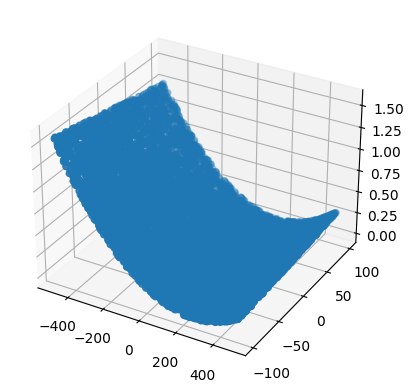

In [ ]:
#Define Limits {X:w, Y:b, Z:J}
w_min = -500
w_max = 500

b_min = -100
b_max = 100

# Use Larger for a fine Values
Sample_count = 10000 ;

# Sampling the 3d space
W_set = np.random.randint(w_min,w_max,(Sample_count,))
b_set = np.random.randint(b_min,b_max,(Sample_count,))
J_set = np.zeros(Sample_count)

# Calculating the Cost for each (w,b)
for i in range(Sample_count):
  J_set[i] = cost_function_for_single_variable(x_train,y_train,W_set[i], b_set[i] ,m)


# Visualization of the cost destribution ~ 3D scatter

from mpl_toolkits import mplot3d
ax = plt.axes(projection = "3d")

ax.scatter(W_set,b_set,J_set)
plt.show()

#Get the minimum valued element id
minElementID = int(np.where(J_set == np.amin(J_set))[0])

print(" The minimum vaue for the cost function is {} \n The best fit (w,b)      : ( {} , {}) \n Actual values for given : (209,2.4))".format(J_set[minElementID],W_set[minElementID],b_set[minElementID]))


In [ ]:
# Since collab isn't allowing to rotate the plots,
import plotly.graph_objects as go
import numpy as np

# Helix equation
x, y, z = W_set, b_set, J_set

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='black', opacity=0.80)])
fig.show()

 The minimum vaue for the cost function is 1741.1483333333326 
 The best fit (w,b)      : ( 209 , 0) 
 Actual values for given : (209,2.4))


3. Calculating w,b using gradient descent algorythm

In [ ]:
# Calculate for given data & initial conditions for Example 1.1
w_final,b_final,J_log,P_log = gradient_descent()

# Print W,b & round for 4 decimal plaecs
print("W,b values for the best fit line is :{0:10.4f} & {0:10.4f} ".format( w_final,b_final))

17376
W,b values for the best fit line is :  209.3629 &   209.3629 


In [ ]:
# Plot the Convergence log


J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

## 1.3 Multi variable system



### 1.3.1 Notation


Notation updated for multiple features.

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example matrix                  | `X_train` |
|  $\mathbf{Y}$  | training example  targets                | `Y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |


### 1.3.2 Theory



**Training example matrix** <br>
$$\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.



**Parameter vector w, b**

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.



**Model Prediction With Multiple Variables** <br><br>
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector dot product



**Compute Cost With Multiple Variables**

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$




**Gradient descent for multiple variables:** <br>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \newline \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

### 1.3.3 Example 02 : Housing Price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |
| ----------------| ------------------- |----------------- |--------------|-------------- |
| 2104            | 5                   | 1                | 45           | 460           |
| 1416            | 3                   | 2                | 40           | 232           |
| 852             | 2                   | 1                | 35           | 178           |


In [ ]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

'''
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-7

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  100.0

# Larger the better <~ Automatically breaks the loop when converged!
number_of_iterations = 1000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor
# Better to use smaller values
convergence_factor = 0.00001


'''
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = x_train.shape[0]
# n ~ The number of features <~~ Column count
n = x_train.shape[1]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_multi_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0.0

  for i in range(m):
    cost_holder += (np.dot(x[i],w)+b-y[i])**2

  #Avoid zero devison
  if (cost_holder == 0.0):
    cost_holder = 0.0
  else:
    cost_holder = cost_holder/(2*m)

  # Return the cost
  return cost_holder

'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient_multi(x,y,w,b,m,n):

  # Temp Data holders for two returns
  temp_dj_dw = np.zeros((n,)) # elements count equal to columns
  temp_dj_db = 0.0

  for i in range(m):

    Error_calculate = np.dot(x[i],w)+b-y[i]
    # Calculate dj_db
    # Loop for m times (~ Eq to number of Rows)
    temp_dj_db  +=  Error_calculate

    #Loop for each i th set of training examples
    for j in  range(n):
      temp_dj_dw[j] += Error_calculate*x[i,j]


  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0

  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent_multi():
  # Load the data & conditions to the function
  global x_train,y_train,initial_w,initial_b,m,n,learning_rate,number_of_iterations

  # Store calculated J
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []

  #Store temp w,b
  w  = np.copy(initial_w)
  b  = initial_b

  # Comparing vector
  comparing_dj_dw_vector = learning_rate*convergence_factor*np.ones(n)


  # Loop for given iterations
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient_multi(x_train,y_train,w,b,m,n)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_multi_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]


    # Breaking when converged
    if (dj_dw**2 < comparing_dj_dw_vector**2).all() and dj_db < learning_rate*convergence_factor:
      print(dj_dw,comparing_dj_dw_vector)
      print(dj_dw <comparing_dj_dw_vector)
      print(i)
      break

  return w,b,J_log,Parameter_log


**Testing**

In [ ]:
#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



W,b values for the best fit line is :[-2.52 99.8  99.67 92.77] & 99.77448108024004 


**Plotting the convergence**

In [ ]:
# Plot the Convergence log
J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

### 1.3.4 Feature Engineering

The algorythem in example 1.2.3 is not accurate.When the alpha and initial values are changed , the prediction accuracy changes drastically. This can be eleminated by feature scaling

Three different techniques: (There are many)
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features , and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization which we will explore below.

In [ ]:
"""
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)



**Solve the above 1.2.4 using feature scaled example sets**

In [ ]:
'''
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor
# Better to use smaller values
convergence_factor = 0.00001

'''
Feature scaling
'''
X_norm, mu, sigma = zscore_normalize_features(x_train)

x_train = X_norm

'''Run gradient descent'''


'Run gradient descent'

Test 01 :

In [ ]:
'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-3

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  0.0

# Larger the better <~ Automatically breaks the loop when converged!
number_of_iterations = 40000

#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



[ 3.34e-09 -3.34e-09  4.98e-08  6.19e-09] [5.e-08 5.e-08 5.e-08 5.e-08]
[ True  True  True  True]
4298
W,b values for the best fit line is :[ 35.14  53.33 -28.93  27.67] & 289.9999998729948 


Test 2 :

## **1.3 Advanced Vectorized Multi variable system (TBD)**


Consider the above same example: 1.2.3 Housing price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |
| ----------------| ------------------- |----------------- |--------------|-------------- |
| 2104            | 5                   | 1                | 45           | 460           |
| 1416            | 3                   | 2                | 40           | 232           |
| 852             | 2                   | 1                | 35           | 178           |


In [ ]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

'''
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
X_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])



#Initial conditions for gradient descent

# Learning rate ~ Better if small
learning_rate = 0.01

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 0.5, 19, -60, -42])

# Initial value for b
initial_b = 1000

# Larger the better <~ Automatically breaks the loop when converged!
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor
# Better to use smaller values
convergence_factor = 0.001



'''
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = X_train.shape[0]
# n ~ The number of features <~~ Column count
n = X_train.shape[1]




## 1.4 Supervised Machine Learning: Classification

### 1.4.1 Sigmoid function

The formula for a sigmoid function is as follows -

$g(z) = \frac{1}{1+e^{-z}}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.


* Logistic regression, the model is represented as

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:

  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$


 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model,  can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$

  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$ <br><br>



### 1.4.2 Cost function


Cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

where
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

<br>


The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$





In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$

### 1.4.3 Logistic Gradient Descent


T gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model
    $z = \mathbf{w} \cdot \mathbf{x} + b$
    $f_{\mathbf{w},b}(x) = g(z)$
    where $g(z)$ is the sigmoid function:
    $g(z) = \frac{1}{1+e^{-z}}$



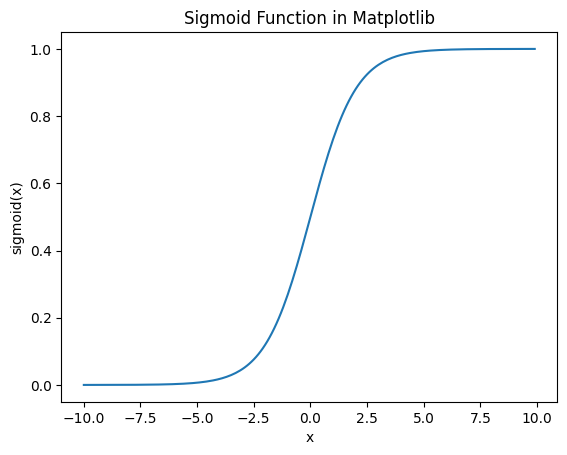

In [ ]:
# Plotting the Sigmoid Function in Python with Matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

### 1.4.4 **Algorithm**

**Dataset**

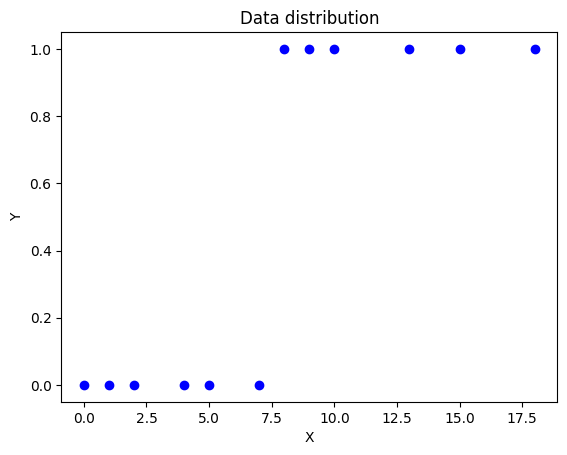

In [ ]:
x_train = np.array([0,1,2,4,5,7,8,9,10,13,15,18])
y_train = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

# Plotting the data
plt.plot(x_train, y_train ,'bo')
plt.xlabel('X') #Tumor size
plt.ylabel('Y') # Is Cancerous Y = 1 , N = 0
plt.title('Data distribution')
plt.show()

In [ ]:
#two feature data set
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])


#Compute the sigmoid of z
def sigmoid(z):

    g = 1/(1+np.exp(-z))

    return g


#Computes cost
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

w_in = np.zeros((1))
b_in = 0


#Computes the gradient for linear regression
def compute_gradient_logistic(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

#Performs batch gradient descent
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = np.copy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing


**Set 1**

In [ ]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


**Set 2**

**Set 1**

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


## 1.5 Additional

### 1.5.1  overfitting

### 1.5.2 Regularized Cost and Gradient

#### 1.5.2.1 Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [ ]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar
    cost = cost / (2 * m)                                              #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


####  1.5.2.2 Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span>

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

In [ ]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar

    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar

    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


#### 1.5.2.3  Gradient descent with regularization

The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.


Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target


* For a  <span style="color:blue"> **linear** </span> regression model
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$
* For a <span style="color:blue"> **logistic** </span> regression model
    $z = \mathbf{w} \cdot \mathbf{x} + b$
    $f_{\mathbf{w},b}(x) = g(z)$
    where $g(z)$ is the sigmoid function:
    $g(z) = \frac{1}{1+e^{-z}}$

The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

In [ ]:
def compute_gradient_linear_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [ ]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw


In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


# 2. Advanced Learning Algorithms


## 2.1 Neural Networks

### 2.1.1 Activation of a Nuron

**Inputs :** <br>
 > $\mathbf{X} = \begin{bmatrix} x_{1}^{(1)} & x_{1}^{(2)} & \ldots & x_{1}^{(k)} \\ x_{2}^{(1)} & x_{2}^{(2)} & \ldots & x_{2}^{(k)} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n}^{(1)} & x_{n}^{(2)} & \ldots & x_{n}^{(k)} \\ \end{bmatrix}$

**Weights:** <br>
> $\mathbf{W} = \begin{bmatrix} w_{1,1} & w_{1,2} & \ldots & w_{1,n} \\ w_{2,1} & w_{2,2} & \ldots & w_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{m,1} & w_{m,2} & \ldots & w_{m,n} \\ \end{bmatrix}$

**Weighted Sum:** <br>
> $\mathbf{Z} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}$

**Activation Function:**

> $\mathbf{A} = f_{(Z)}$

**The vectorized sigmoid function:**<br>

> $\sigma_{(Z)} = \frac{1}{1 + e^{ - Z}}$

### 2.1.2 Standard Notations and Representations

Consider a simple neural network with $n$ layers, where each layer may have a different number of neurons.

> $ \begin{array}{cccc} \text{Input Layer} & \text{Hidden Layer 1} & \text{Hidden layer 2} & \text{Output Layer} \\ (n1 \times 1) & (n2 \times 1) & (n3 \times 1) & (n4 \times 1) \\ \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\  \vdots \\ \text{Neuron n1} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n2} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n3} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n4} \end{bmatrix} \end{array} $

**Matrix Notation:**

**Input Layer:** <br>

> $X^{(1)} = \begin{bmatrix} x_{1}^{(1)} \\ x_{2}^{(1)} \\ \vdots \\ x_{m}^{(1)} \end{bmatrix} $

**Hidden Layers** **(Layer 2 to Layer n-1):** <br> <br>

For each hidden layer $i$ from 2 to $n-1$:

> $ \mathbf{W}^{(i)} = \begin{bmatrix} w_{1,1}^{(i)} & w_{1,2}^{(i)} & \ldots & w_{1,p_i}^{(i)} \\ w_{2,1}^{(i)} & w_{2,2}^{(i)} & \ldots & w_{2,p_i}^{(i)} \\ \vdots & \vdots & \ddots & \vdots \\ w_{p_{i+1},1}^{(i)} & w_{p_{i+1},2}^{(i)} & \ldots & w_{p_{i+1},p_i}^{(i)} \\ \end{bmatrix} $
<br><br>
> $\mathbf{Z}^{(i)} = \mathbf{W}^{(i)} \cdot \mathbf{A}^{(i-1)} + \mathbf{b}^{(i)}$
<br> <br>
> $\mathbf{A}^{(i)} = g(\mathbf{Z}^{(i)})$
<br>

**Output Layer (Layer n):** <br><br>

> $W^{(n)} = \begin{bmatrix} w_{1,1}^{(n)} & w_{1,2}^{(n)} & \ldots & w_{1,p_n}^{(n)} \end{bmatrix} $ <br>

> $\mathbf{Z}^{(n)} = \mathbf{W}^{(n)} \cdot \mathbf{A}^{(n-1)} + \mathbf{b}^{(n)} $ <br>
> $\mathbf{A}^{(n)} = g(\mathbf{Z}^{(n)})$


In these equations, $\mathbf{X}^{(1)}$ represents the input column vector of shape $(m, 1)$, $\mathbf{W}^{(i)}$ represents the weight matrix of shape $(p_i, p_{i-1})$ for the $i$ th hidden layer, $\mathbf{Z}^{(i)}$ represents the weighted sum column vector of shape $(p_i, 1)$ for the $i$ th hidden layer, $\mathbf{A}^{(i)}$ represents the output column vector of shape $(p_i, 1)$ for the $i$ th hidden layer after applying the activation function $g(\cdot)$, and $\mathbf{W}^{(n)}$ represents the weight matrix of shape $(1, p_n)$ for the output layer. Finally, $\mathbf{Z}^{(n)}$ represents the weighted sum column vector of shape $(1, 1)$ for the output layer, and $\mathbf{A}^{(n)}$ represents the final output column vector of shape $(1, 1)$ after applying the activation function $g(\cdot)$.

Consider $j^{th}$ neuron of the $$l^{th}$ layer of a neuron netwok, <br>
> $a_j^{[l]}\ = \ g( \overrightarrow{w_j}^{[l]} \ \dot \ \  \overrightarrow{a}^{[l-1]} + b_j^{[l]})$

## 2.2 TensorFlow implementations


### 2.2.1 Numpy Arrays for TensorFlow

**Importing Libraries :**

In [ ]:
import numpy as np
import tensorflow as tf

1. Create a 1-dimensional array:

In [ ]:
a = np.array([1, 2, 3, 4, 5])
print(a)

[1 2 3 4 5]


2. Create a 2-dimensional array:

In [ ]:
a = np.array([[1, 2, 3, 4, 5]])
print(a)

[[1 2 3 4 5]]


In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b)

[[1 2 3]
 [4 5 6]]


3. Create an array of zeros with a specific shape:

In [ ]:
c = np.zeros((3, 4))
print(c)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


4. Create an array of ones with a specific shape:

In [ ]:
d = np.ones((2, 3))
print(d)

[[1. 1. 1.]
 [1. 1. 1.]]


5. Row matrix

In [ ]:
row_matrix = np.array([[1, 2, 3, 4]])
print(row_matrix)

[[1 2 3 4]]


6. Column Matrix:

In [ ]:
column_matrix = np.array([[1], [2], [3], [4]])
print(column_matrix)

[[1]
 [2]
 [3]
 [4]]


### 2.2.2 Tensor Flow Syntax

Consider the followng network
```
      +------------+         +------------+         +----------+
      |   Layer 1  |         |  Layer  2  |         |     3    |
      |            | ----->  |            | ----->  |          |
      |(25 Neurons)|         |(15 Neurons)|         |(1 Neuron)|
      |            |         |            |         |          |
      +------------+         +------------+         +----------+
        Input                    Hidden             Output
```


1. Create the model

> ```
> import tensorflow as tf
> from tensorflow.keras import Sequential
> from tensorflow.keras.layers import Dense
>
> model = Sequential([
>         # tf.keras.Input(shape=(400,)), ~ if an input re-modeling is required
>         Dense(units = 25 , activation = 'sigmoid'),
>         Dense(units = 15 , activation = 'sigmoid'),
>         Dense(units = 1 , activation = 'sigmoid')
> ])
> ```

2. Loss and cost functions

> ```
> from tensorflow.keras.losses imporrt BinaryCrossentropy
> model.compile(loss = BinaryCrossentropy())
> ```

3. Gradient descent

> ```
> model.fit(X,y,epoches =100)
> ```

### 2.2.3 Loss Functions

|   Name      |  Mathematical Expression   |   Applications        |   Other Notes     |   Code      |
|-------------|----------------------------|-----------------------|-------------------|-------------|
| Mean Squared Error (MSE) | $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$ | Regression tasks | Sensitive to outliers | `tf.keras.losses.mean_squared_error` |
| Binary Crossentropy | $-\frac{1}{n}\sum_{i=1}^{n}[y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$ | Binary classification tasks | Suitable for binary output | `tf.keras.losses.binary_crossentropy` |
| Categorical Crossentropy | $-\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{C}y_{ij}\log(\hat{y}_{ij})$ | Multiclass classification tasks | Requires one-hot encoded labels | `tf.keras.losses.categorical_crossentropy` |
| Sparse Categorical Crossentropy | $-\frac{1}{n}\sum_{i=1}^{n}\log(\hat{y}_{i})$ | Multiclass classification tasks | Handles integer-encoded labels | `tf.keras.losses.sparse_categorical_crossentropy` |
| Kullback-Leibler Divergence (KLD) | $\frac{1}{n}\sum_{i=1}^{n}y_i\log\left(\frac{y_i}{\hat{y}_i}\right)$ | Used for unsupervised learning,<br> variational autoencoders | Measures the dissimilarity between <br> probability distributions | `tf.keras.losses.kullback_leibler_divergence` |
| Huber Loss | $\frac{1}{n}\sum_{i=1}^{n}L_\delta(y_i, \hat{y}_i)$, $L_\delta$ is defined as: <br> $L_\delta = \begin{cases} \frac{1}{2}(y_i - \hat{y}_i)^2 & \text{if } |y_i - \hat{y}_i| \leq \delta \\ \delta(|y_i - \hat{y}_i| - \frac{1}{2}\delta) & \text{otherwise} \end{cases}$ | Robust regression tasks | Less sensitive to outliers than MSE | Custom implementation |
| Mean Absolute Error (MAE) | $\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$ | Regression tasks | Robust to outliers | `tf.keras.losses.mean_absolute_error` |
| Cosine Similarity | $-\frac{\sum_{i=1}^{n}y_i\hat{y}_i}{\sqrt{\sum_{i=1}^{n}y_i^2}\sqrt{\sum_{i=1}^{n}\hat{y}_i^2}}$ | Similarity or ranking tasks | Measures the cosine of the angle <br> between two vectors | `tf.keras.losses.cosine_similarity` |


### 2.2.4 Activation Functions



|   Name      |  Mathematical Expression   |   Details              |   Code      |
|-------------|----------------------------|-----------------------|-------------|
| Linear      | $f(x) = x$               | Linear activation with no <br>activation applied. Useful in <br> regression tasks or as a last <br> layer for regression outputs. | `tf.keras.activations.linear` |
| Sigmoid     | $f(x) = \frac{1}{1 + e^{-x}}$ | Non-linear activation function <br> that squashes values between <br>0 and 1. Commonly used in <br> binary classification tasks or <br> as a last layer for binary outputs. | `tf.keras.activations.sigmoid` |
| Tanh        | $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | Non-linear activation function <br>that squashes values between<br> -1 and 1. It is useful in neural <br>networks as it introduces <br>non-linearity and can be used in<br> classification or regression tasks. | `tf.keras.activations.tanh` |
| ReLU        | $f(x) = \max(0, x)$      | Rectified Linear Unit (ReLU) <br> activation function. It returns 0<br> for negative inputs and the input<br> value for non-negative inputs, <br>introducing non-linearity. <br><br>Commonly used in hidden layers<br> of deep neural networks. | `tf.keras.activations.relu` |
| Leaky ReLU  | $f(x) = \max(\alpha x, x)$, $\alpha < 1$ | Leaky Rectified Linear Unit<br> (Leaky ReLU) activation function.<br> It is similar to ReLU but allows <br>small negative values for negative <br>inputs by introducing a small slope<br> $\alpha$ for negative inputs. Helps prevent <br>"dying ReLU" problem. | `tf.keras.layers.LeakyReLU(alpha)` |
| Softmax     | $f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{C} e^{x_j}}$ | Activation function that converts a <br>vector of values into a probability<br> distribution, ensuring the sum of the <br>outputs is 1. <br>Used for multiclass classification<br> tasks. | `tf.keras.activations.softmax` |
| Swish       | $f(x) = x \cdot \sigma(\beta x)$, $\sigma$ is the sigmoid function | Activation function that combines<br> the linearity of the identity function <br>with the non-linearity of the <br>sigmoid function.<br> Proposed as an alternative to ReLU,<br> offering better training performance. | `tf.keras.activations.swish` |



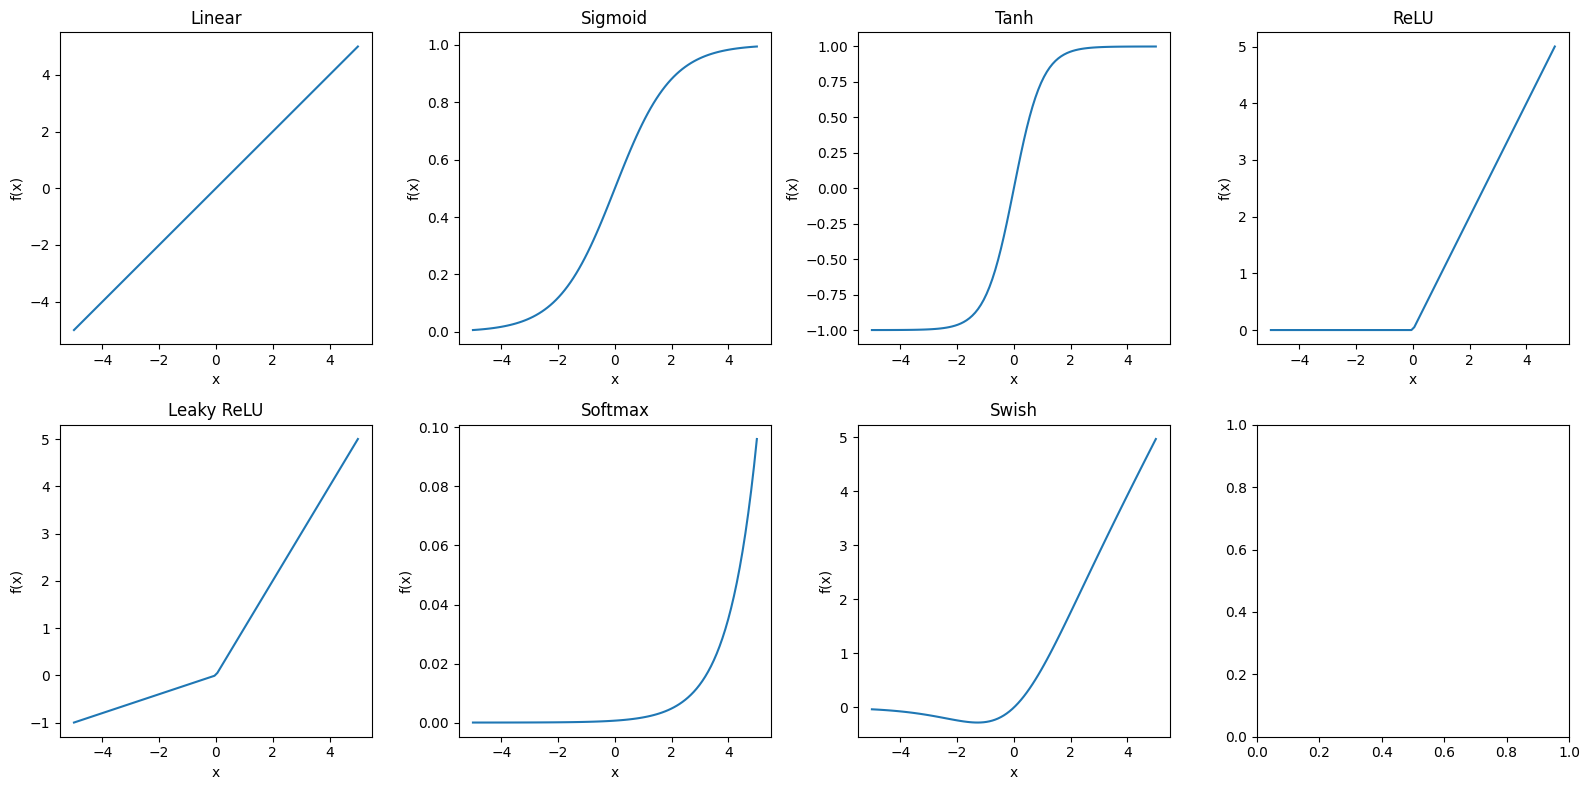

In [ ]:
#Plot activation functions
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define x values
x = np.linspace(-5, 5, 100)

# Define activation functions
activation_functions = [
    ('Linear', lambda x: x, tf.keras.activations.linear),
    ('Sigmoid', tf.sigmoid, tf.keras.activations.sigmoid),
    ('Tanh', tf.tanh, tf.keras.activations.tanh),
    ('ReLU', tf.nn.relu, tf.keras.activations.relu),
    ('Leaky ReLU', tf.nn.leaky_relu, tf.keras.layers.LeakyReLU(alpha=0.2)),
    ('Softmax', tf.nn.softmax, tf.keras.activations.softmax),
    ('Swish', lambda x: x * tf.sigmoid(x), tf.keras.activations.swish)
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Plot each activation function
for i, (name, activation_func, _) in enumerate(activation_functions):
    y = activation_func(x)
    ax = axes[i]
    ax.plot(x, y)
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


### 2.2.5 Optimization Algorithms



| Algorithm             | Explanation                                                                                                                               | Applications                               | Code (TensorFlow)                                                                                                                         |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| Stochastic Gradient Descent (SGD)         | The basic optimization algorithm that updates <br> parameters using the average gradient of a <br> randomly selected subset of the training data. | Neural networks, deep learning              | `tf.keras.optimizers.SGD(learning_rate=0.01)`                                                                                              |
| Adam                  | An adaptive optimization algorithm that<br> computes adaptive learning rates based on <br>the first and second moments of the gradients.          | Neural networks, deep learning              | `tf.keras.optimizers.Adam(learning_rate=0.001)`                                                                                            |
| RMSprop               | An adaptive optimization algorithm that divides <br>the learning rate by a running average of the root<br> mean square of past gradients.        | Neural networks, deep learning              | `tf.keras.optimizers.RMSprop(learning_rate=0.001)`                                                                                         |
| Adagrad               | An adaptive optimization algorithm that adjusts<br> the learning rate based on the sum of squared <br>gradients for each parameter.              | Sparse data, natural language processing    | `tf.keras.optimizers.Adagrad(learning_rate=0.01)`                                                                                           |
| Adadelta              | An extension of Adagrad that limits the<br> accumulation of squared gradients by using a <br>decay rate.                                        | Neural networks, deep learning              | `tf.keras.optimizers.Adadelta(learning_rate=1.0)`                                                                                           |
| Adamax                | A variant of Adam that uses the infinity norm <br>(maximum absolute value) of the gradients instead <br>of their L2 norm.                       | Neural networks, deep learning              | `tf.keras.optimizers.Adamax(learning_rate=0.002)`                                                                                          |
| Nadam                 | An extension of Adam that incorporates Nesterov <br>momentum in addition to adaptive learning rates.                                         | Neural networks, deep learning              | `tf.keras.optimizers.Nadam(learning_rate=0.002)`                                                                                            |
| Ftrl                  | An optimization algorithm designed for linear<br> models with large-scale sparse data.                                                        | Large-scale linear models                   | `tf.keras.optimizers.Ftrl(learning_rate=0.1)`                                                                                               |
| Proximal Gradient Descent (PGD)           | An algorithm that performs proximal updates<br> by adding a proximal term to the traditional <br>gradient descent.                               | L1 or L2 regularization, sparse models       | `tf.keras.optimizers.ProximalGradientDescent(learning_rate=0.01, l1_regularization_strength=0.01)`                                        |
| Natural Gradient      | An optimization algorithm that considers the<br> geometry of the parameter space by using the<br>Fisher information matrix.                     | Variational inference, natural gradient      | Custom implementation                                                                                                                      |



In [ ]:
''' Syntax ~> compile
model.compile(optimizer =tf.keras.optimizers.SGD(learning_rate=0.01))
'''

' Syntax ~> compile\nmodel.compile(optimizer =tf.keras.optimizers.SGD(learning_rate=0.01))\n'

### 2.2.6 Coffee Roasting

A simple neural network using TensorFlow and Keras to identify whether coffee beans are roasted or not based on temperature and time features.

In [ ]:
# First, import the necessary libraries: TensorFlow, Keras, and NumPy.
import tensorflow as tf
from tensorflow import keras
import numpy as np

'''
A sample dataset containing the features (temperature and time) and
corresponding labels (whether the coffee beans are roasted or not).
'''
# Input features (temperature and time)

features = np.array([[185.32, 12.69], [259.92, 11.87], [231.01, 14.41], [175.37, 11.72], [187.12, 14.13],
        [225.91, 12.1], [208.41, 14.18], [207.08, 14.03], [280.6, 14.23], [202.87, 12.25],
        [196.7, 13.54], [270.31, 14.6], [192.95, 15.2], [213.57, 14.28], [164.47, 11.92],
        [177.26, 15.04], [241.77, 14.9], [237.0, 13.13], [219.74, 13.87], [266.39, 13.25],
        [270.45, 13.95], [261.96, 13.49], [243.49, 12.86], [220.58, 12.36], [163.59, 11.65],
        [244.76, 13.33], [271.19, 14.84], [201.99, 15.39], [229.93, 14.56], [204.97, 12.28],
        [173.19, 12.22], [231.51, 11.95], [152.69, 14.83], [163.42, 13.3], [215.95, 13.98],
        [218.04, 15.25], [251.3, 13.8], [233.33, 13.53], [280.24, 12.41], [243.02, 13.72],
        [155.67, 12.68], [275.17, 14.64], [151.73, 12.69], [151.32, 14.81], [164.9, 11.73],
        [282.55, 13.28], [192.98, 11.7], [202.6, 12.96], [220.67, 11.53], [169.97, 12.34],
        [209.47, 12.71], [232.8, 12.64], [272.8, 15.35], [158.02, 12.34], [226.01, 14.58],
        [158.64, 12.24], [211.66, 14.17], [271.95, 14.97], [257.16, 11.71], [281.85, 13.96],
        [161.63, 12.52], [233.8, 13.04], [210.29, 14.72], [261.24, 13.69], [256.98, 13.12],
        [281.56, 13.92], [280.64, 11.68], [269.16, 13.74], [246.34, 12.27], [224.07, 12.66],
        [164.24, 11.51], [272.42, 14.18], [177.68, 12.53], [212.86, 14.77], [165.88, 15.37],
        [277.43, 12.48], [236.51, 12.94], [244.14, 11.85], [213.45, 13.85], [234.57, 14.27],
        [270.34, 12.47], [170.68, 13.06], [226.79, 15.34], [245.92, 14.45], [281.32, 12.57],
        [185.03, 13.19], [189.88, 14.1], [278.48, 12.11], [219.92, 14.21], [216.58, 15.15],
        [249.48, 15.03], [165.09, 12.28], [158.87, 14.82], [279.98, 11.56], [256.55, 14.41],
        [272.61, 12.58], [246.49, 12.45], [160.26, 14.48], [155.7, 14.3], [188.27, 13.45],
        [270.36, 12.47], [213.22, 12.92], [175.7, 13.39], [174.52, 14.7], [233.0, 12.63],
        [281.37, 12.88], [240.62, 14.43], [185.81, 11.55], [270.5, 15.33], [172.98, 12.11],
        [208.41, 13.89], [283.51, 15.35], [283.36, 12.48], [230.85, 13.24], [181.24, 11.76],
        [172.78, 12.93], [161.88, 12.1], [156.03, 13.99], [216.52, 12.47], [221.06, 13.2],
        [238.99, 15.23], [197.69, 14.08], [179.55, 15.26], [233.39, 12.13], [184.7, 12.14],
        [174.18, 12.73], [261.11, 13.33], [187.42, 13.18], [186.1, 14.43], [157.94, 12.66],
        [193.64, 12.23], [249.65, 12.22], [190.56, 11.73], [252.0, 12.96], [238.55, 12.37],
        [152.94, 12.79], [255.17, 14.85], [197.09, 14.89], [156.8, 13.59], [184.75, 13.26],
        [179.92, 15.07], [190.79, 15.28], [164.73, 13.22], [209.87, 14.34], [196.58, 13.47],
        [159.51, 12.74], [247.87, 11.92], [212.44, 12.45], [172.34, 11.99], [259.87, 14.25],
        [201.23, 13.07], [248.34, 13.92], [273.66, 15.18], [215.09, 14.14], [223.53, 12.74],
        [211.22, 14.38], [224.61, 14.03], [215.75, 15.31], [254.82, 12.02], [259.9, 15.17],
        [260.25, 12.87], [199.67, 12.47], [157.52, 13.39], [264.81, 14.58], [239.4, 14.89],
        [238.98, 12.39], [258.43, 12.97], [270.16, 12.81], [162.41, 14.42], [164.53, 14.98],
        [205.61, 14.62], [157.1, 13.68], [241.38, 12.02], [232.13, 12.07], [191.04, 12.96],
        [233.64, 12.02], [174.95, 14.63], [246.64, 13.32], [188.07, 14.27], [213.16, 12.75],
        [268.08, 12.31], [258.58, 13.97], [237.21, 14.23], [251.02, 15.02], [274.28, 12.52],
        [172.12, 15.09], [177.52, 12.39], [258.71, 15.36], [264.01, 13.57], [200.71, 15.45],
        [249.37, 14.02], [151.5, 12.28], [151.82, 15.13], [181.92, 12.18], [228.65, 12.31],
        [223.78, 15.3], [266.63, 12.48], [273.68, 13.1], [220.61, 12.8], [284.99, 12.73]])
features = features.reshape((200,2))
# Output labels (roasted or not roasted)
labels = np.array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0.])



In [ ]:

'''
Before training the neural network, its better to preprocess the data.
In this case, normalize the feature values to a range between 0 and 1.
'''
# Normalize feature values
features = features / np.amax(features, axis=0)

'''
Build the neural network model using Keras. For simplicity,
create a basic feedforward network with two dense layers.

In this example, there are two input features (temperature and time),
so the input shape for the first layer is (2,).
The first dense layer consists of 10 neurons with the sigmoid activation function,
and the final dense layer has 1 neuron with the sigmoid activation
function to produce a binary output.
'''

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(2,), activation='sigmoid',name = 'layer1'),
    keras.layers.Dense(1, activation='sigmoid',name = 'layer2')
])

#Compile and train the model using the dataset.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(features, labels, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 5ms/step - loss: 0.7804 - accuracy: 0.2150
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 0.2150
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.2150
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.2150
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.2150
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.2900
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6900
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.7850
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.7850
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.7850
Epoch 11/50
7/7 [======================

In [ ]:
#Make predictions using the trained model on new, unseen data.
new_data = np.array([[200, 13.9], [200, 17]])

# Normalize new data
new_data = new_data / np.amax(features, axis=0)

# Make predictions
predictions = model.predict(new_data)
print(predictions)


1/1 [==============================] - 0s 75ms/step
[[0.15]
 [0.15]]


In [ ]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[0.]
 [0.]]


In [ ]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-0.03  0.37 -0.45 -0.05 -0.75  0.64  0.28 -0.75 -0.08  0.37]
 [ 0.25 -0.53 -0.01 -0.33 -0.17 -0.03  0.27 -0.69 -0.05 -0.28]] 
b1: [ 0.27 -0.16 -0.17 -0.16 -0.14  0.22  0.2  -0.06  0.24  0.2 ]
W2:
 [[-0.26]
 [ 0.2 ]
 [ 0.45]
 [ 0.34]
 [ 0.12]
 [-0.38]
 [-0.6 ]
 [-0.06]
 [-0.33]
 [-0.7 ]] 
b2: [-0.19]


## 2.3 Multiclass Classification

### 2.3.1 Softmax

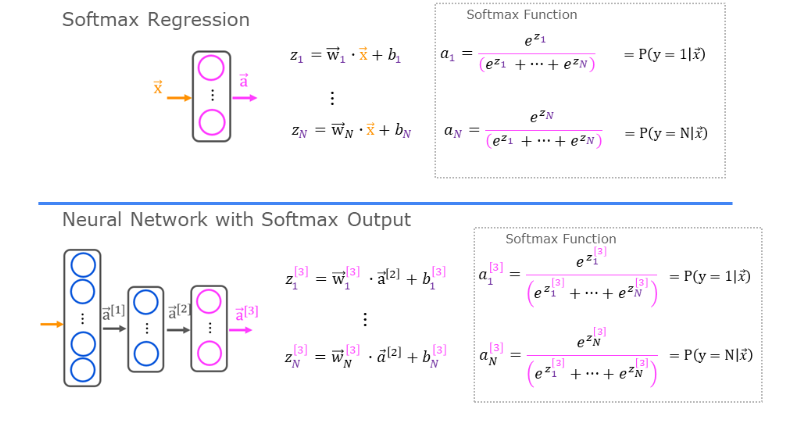

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


The loss function associated with Softmax, the cross-entropy loss, is:
$\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}$

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.


Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. <br>
$1(y == n) == \begin{cases} 1, & \text{if y==n}.\\ 0, & \text{otherwise}.
  \end{cases}$

Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


#### 2.3.1.1 Declaring Softmax

1. Dense Layers

> ```
> Dense(4, activation = 'softmax')
> ```

2. Compile

> ```
> model.compile (
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
> ```

3. Preffered Way

> ```
> Dense layer =>  Dense(4, activation = 'linear')
> Model       =>  preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
> ```

```from_logits=True``` reduces the round off errors when doing the calculations.

### 2.3.2 Example 01 ~ Random 4 clusters

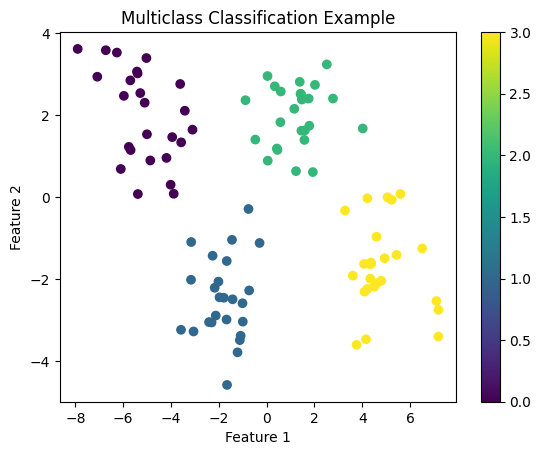

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with four clusters
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

# Plot the data points with different colors for each class
plt.scatter(X_train[:, 0],X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multiclass Classification Example')
plt.colorbar()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Training the model
tf.random.set_seed(1234)  # applied to achieve consistent results

# Model ~> 2d points as in put and four classes output

model = Sequential(
    [
        Dense(2 , activation = 'relu' , name ='Layer1'),
        Dense(4 , activation = 'linear' , name ='Layer2')
    ]
)

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

# Train the model
model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 1.9940
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 1.8177
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 1.6893
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 1.5843
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 1.5062
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 1.4526
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 1.4092
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 1.3761
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 1.3507
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 1.3285


##2.4 Layers of Neural Networks


| Layer Type          | Explanation                                                                   | Applications                                             |
|---------------------|-------------------------------------------------------------------------------|----------------------------------------------------------|
| Dense               | Fully connected layer where each neuron <br> receives input from all previous neurons | Classification, regression, pattern recognition            |
| Convolutional       | Applies convolution operation to input<br> data, capturing local patterns           | Image recognition, computer vision                        |
| Recurrent           | Processes sequential data, preserving <br>information through recurrent connections | Natural language processing, time series analysis          |
| Pooling             | Reduces dimensionality by downsampling <br>input data                               | Feature extraction, reducing computational complexity     |
| Dropout             | Randomly sets a fraction of input units to <br>zero during training                  | Regularization, preventing overfitting                     |
| Batch Normalization | Normalizes input data within a mini-batch,<br> improving network training            | Improving network convergence, regularization             |
| Activation          | Applies a non-linear activation function to <br>introduce non-linearity             | Enabling complex mappings, increasing model capacity       |
| Flatten             | Converts multi-dimensional input into a <br>one-dimensional vector                  | Transition between convolutional and fully connected layers |
| Embedding           | Represents discrete categorical variables <br>as continuous vectors                 | Natural language processing, recommendation systems        |
| LSTM                | Long Short-Term Memory layer with <br>memory cells and gating mechanisms            | Sequence modeling, speech recognition, language translation|



## 2.5 Basics of Computational Grapghs

**Computational Graphs:**

> A computational graph is a directed graph that represents mathematical operations and their dependencies. It is composed of nodes, which represent operations or variables, and edges, which represent the flow of data between nodes. Each node performs a specific mathematical operation and produces an output that becomes the input for subsequent nodes. This graph structure allows for efficient computation and automatic differentiation to calculate gradients during training.

**Forward Propagation:**

> Forward propagation refers to the process of moving input data through the computational graph to obtain a predicted output. It involves sequentially applying the operations defined by the nodes in the graph. The output of each operation becomes the input for the next operation.

Example:
Consider a simple computational graph with two nodes: Node A performs a linear transformation (multiplication) and Node B performs a non-linear activation (ReLU) operation. Let's say the input is x = 3.

```
   (x)     (2)    (6)
     └───►(A)───►(B)──► y
```

1. Node A performs a linear transformation: $y_A = 2 * x => 2 * 3 => 6$
2. Node B applies a ReLU activation: $y = max(0, y_A) = max(0, 6) = 6$



**Backpropagation:**
> Backpropagation is an algorithm used to calculate the gradients of the loss function with respect to the parameters of the computational graph. It enables efficient computation of derivatives by propagating the error gradient backward through the graph.


**Example** <br>
Evaluate the function $y = 5x^2 + 6x + 3$ using forward propagation and calculate its derivative using backpropagation.

**Forward Propagation:** <br>

Given the function y = 5x^2 + 6x + 3 and x = 2, By performing the forward propagation to compute the output y.

1. Start with the input x = 2.
2. Apply the first operation, squaring x: x^2 = 2^2 = 4.
3. Multiply x^2 by 5: 5x^2 = 5 * 4 = 20.
4. Multiply x by 6: 6x = 6 * 2 = 12.
5. Add the results of steps 3 and 4 together: 20 + 12 = 32.
6. Add 3 to the result: 32 + 3 = 35.

Therefore, when x = 2, the forward propagation yields y = 35.

**Backpropagation:** <br>
Calculate the derivative of the function y = 5x^2 + 6x + 3 with respect to x using backpropagation. (Use $x = x + \epsilon$ Modeling!)

1. Start with the derivative of the final output, which is equal to 1.
2. Calculate the derivative of y with respect to 35: ∂y/∂y = 1.
3. Calculate the derivative of y with respect to 32: ∂y/∂(20 + 12) = ∂y/∂(5x^2 + 6x) = 1.
4. Calculate the derivative of y with respect to 20: ∂y/∂(5x^2) = 1 * 5 = 5.
5. Calculate the derivative of y with respect to 12: ∂y/∂(6x) = 1 * 6 = 6.
6. Calculate the derivative of y with respect to x: ∂y/∂x = 5 * 2 + 6 = 10 + 6 = 16.

Therefore, the derivative of y = 5x^2 + 6x + 3 with respect to x is 16 when x = 2.


**Example**

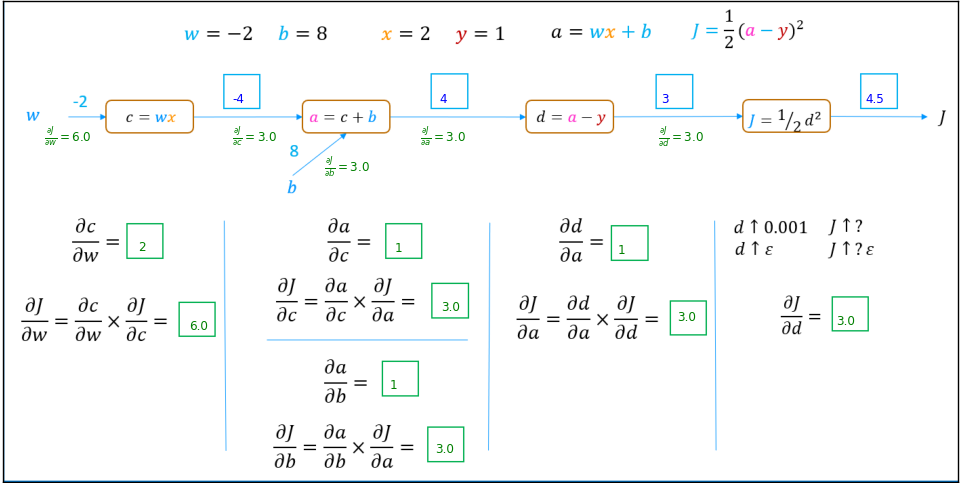

## 2.6 Diagnosis of Machine Learning Algorithm

1. **Understand the Problem:**

> For example, let's consider a problem where need to predict housing prices based on various features such as location, size, number of bedrooms, and age of the property.

2. **Data Inspection:**

> Inspect the dataset for any data quality issues or anomalies. For instance, may discover missing values in the "age" feature or outliers in the "price" variable.

3. **Error Analysis:**

> Examine instances where the algorithm is making errors or producing unexpected results. For instance, if the algorithm is consistently underestimating the prices for houses with larger sizes, that indicates a specific pattern of errors.

4. **Model Evaluation:**

> Evaluate the performance of the machine learning model using appropriate metrics such as mean squared error (MSE) or R-squared. For example, if find that the model's MSE is high, indicating poor predictive accuracy.

5. **Feature Analysis:**

> Analyze the importance and relevance of different features in the model. For instance,  use feature importance techniques such as permutation importance or feature importance from tree-based models to identify which features have the most impact on the predictions.

6. **Check Implementation:**

> Review the implementation of the machine learning algorithm, including data preprocessing, feature scaling, or model training steps. For example, might discover that the data normalization step was not properly applied, leading to incorrect feature scaling.

7. **Hyperparameter Tuning:**

> Experiment with different hyperparameter values to find the optimal configuration. Adjust parameters like learning rate, regularization strength, or number of hidden layers. For instance, vary the learning rate and observe its impact on the convergence and performance of the model.

8. **Cross-validation and Validation Set:**

> Use cross-validation techniques to assess the model's performance on different subsets of the data. Set aside a validation set to monitor the model's performance during training. For example, might find that the model performs well on the training set but poorly on the validation set, indicating overfitting.

9. **Debugging Tools and Techniques:**

> Utilize debugging tools and techniques available in the programming language or machine learning framework. For instance,may print intermediate results, visualize feature distributions or predictions, or use debugging libraries specific to using framework.

10. **Seek Feedback and Collaborate:**

> Seek feedback from peers, mentors, or domain experts. Collaborate with other data scientists or machine learning practitioners to get fresh perspectives. For example, someone might suggest using a different algorithm or applying a specific technique to address the issues encountered.


### 2.6.1 Error Analysis

Linear Regression Model:

$ J_\text{test}(\mathbf{w},b) =
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2
            \
$

Classification Model:

$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1}
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$

### 2.6.2 Cross Validation and Validation Set

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |

### 2.6.3 Bias and Varience

Error variation for each characteristic:

Characteristics             | Training Set          | Cross Validation Set  | Test Set
----------------------------|-------------------|------------------|------------------|
Overfitting                 | Low                   | High                  | High
Underfitting                | High                  | High                  | High
Just Right                  | Moderate              | Moderate              | Moderate


1. **Overfitting:**
   - **Training Set:** A model that overfits the training set will have a low error rate, indicating good performance on the training data.
   - **Cross Validation Set:** However, the same model will perform poorly on the cross validation set, indicating a high error rate. It fails to generalize well to unseen data and exhibits high variance.
   - **Test Set:** The model will also perform poorly on the test set, showing a high error rate. It is unable to generalize beyond the training data, leading to inaccurate predictions on unseen data.

2. **Underfitting:**
   - **Training Set:** An underfit model will have a high error rate on the training set, indicating poor performance and low complexity in capturing the underlying patterns.
   - **Cross Validation Set:** Similarly, the underfit model will also perform poorly on the cross validation set, indicating a high error rate. It fails to capture the complexity and general trends in the data.
   - **Test Set:** The underfit model will continue to perform poorly on the test set, showing a high error rate. It lacks the ability to capture the underlying patterns, resulting in inaccurate predictions.

3. **Just Right:**
   - **Training Set:** A model that is well-balanced and captures the underlying patterns without overfitting or underfitting will have a moderate error rate on the training set.
   - **Cross Validation Set:** The same model will demonstrate a moderate error rate on the cross validation set, indicating reasonable generalization and the ability to capture relevant patterns in the data.
   - **Test Set:** The well-fitted model will also perform moderately well on the test set, indicating good generalization and accurate predictions on unseen data.




| Model Type            | Baseline Performance Difference | Training Error Difference | Cross-Validation Error Difference |
|-----------------------|--------------------------------|--------------------------|----------------------------------|
| High Variance         | Potential for significant improvement over baseline | Low (model overfits)  | High (poor generalization)       |
| High Bias              | Close to baseline performance   | High (model underfits)   | Low (better generalization)       |
| High Bias High Variance| Potential for significant improvement over baseline | High (model underfits) | High (poor generalization)       |

- **Baseline Performance Difference:** The difference between the model's performance and the baseline level of performance. A high variance model and a high bias high variance model have the potential for significant improvement over the baseline, while a high bias model is closer to the baseline performance level.
- **Training Error Difference:** The difference between the model's performance on the training data and the baseline level of performance. A high variance model typically has a low training error (overfits the data), while a high bias model has a high training error (underfits the data).
- **Cross-Validation Error Difference:** The difference between the model's performance on the cross-validation data and the baseline level of performance. A high variance model tends to have a high cross-validation error, indicating poor generalization ability. A high bias model, on the other hand, tends to have a low cross-validation error, suggesting better generalization.


### 2.6.4 Establishing a Baseline Level of Performance

1. **Define the problem:** Clearly define the problem you aim to solve with the machine learning model. Identify the task, such as image classification, sentiment analysis, or speech recognition. Understand the objectives and requirements of the project.

2. **Gather and preprocess data:** Collect a representative dataset that encompasses the problem domain. Ensure the dataset is properly labeled or annotated for supervised learning. Perform necessary preprocessing steps like data cleaning, normalization, and splitting into training and test sets.

3. **Choose evaluation metrics:** Select appropriate evaluation metrics that align with the problem and its objectives. Common metrics include accuracy, precision, recall, F1 score, mean squared error (MSE), or any relevant domain-specific metric.

4. **Human-level performance:** Estimate the baseline level of performance by considering human-level performance. If humans can achieve a certain accuracy or level of expertise in the task, that becomes the starting point for evaluating the machine learning model.

5. **Competing algorithms:** Research and identify existing algorithms or models that have been developed for solving similar problems. Evaluate their performance and consider them as competing baselines. This helps establish a comparison point for assessing the performance of your model.

6. Guess based on experience: If there is no existing human-level performance or competing algorithms, make an educated guess based on prior experience in the field. Leverage domain expertise or insights from related tasks to set an initial expectation of performance.

7. **Implement a basic model:** Develop a basic machine learning model as a starting point. Choose a simple algorithm or architecture that is appropriate for the problem at hand. Train the model using the training dataset.

8. **Evaluate the baseline model:** Use the test dataset to evaluate the performance of the baseline model. Measure its performance using the chosen evaluation metrics. This establishes the baseline level of performance for your initial model.

9. C**ompare with human-level and competing baselines:** Compare the performance of the baseline model with human-level performance and competing algorithms. Assess how the model fares against these baselines and understand its relative strengths and weaknesses.

10. **Iterate and improve:** Once the baseline is established, iterate on the model by experimenting with different algorithms, architectures, hyperparameters, or data augmentation techniques. Continuously evaluate and compare the improvements against the established baselines.


### 2.6.5 Learning Curves

**Valid Model**

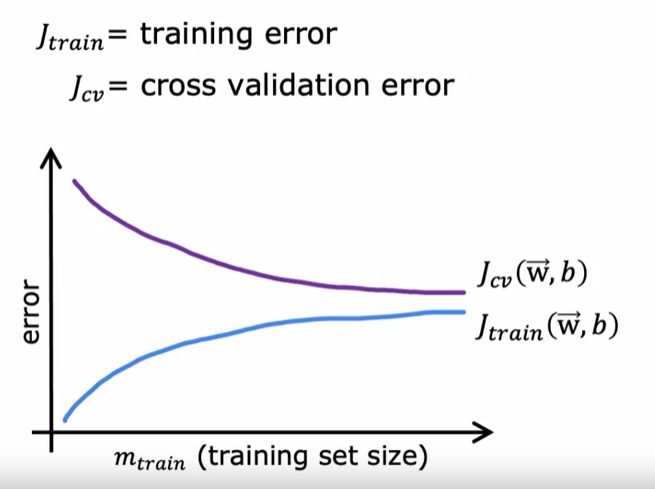

**High Bias Model**

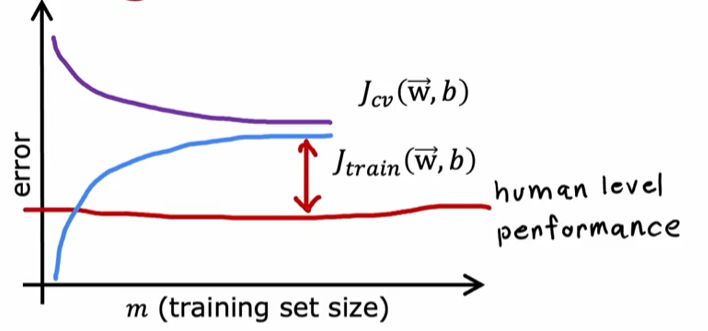

**High Varience**

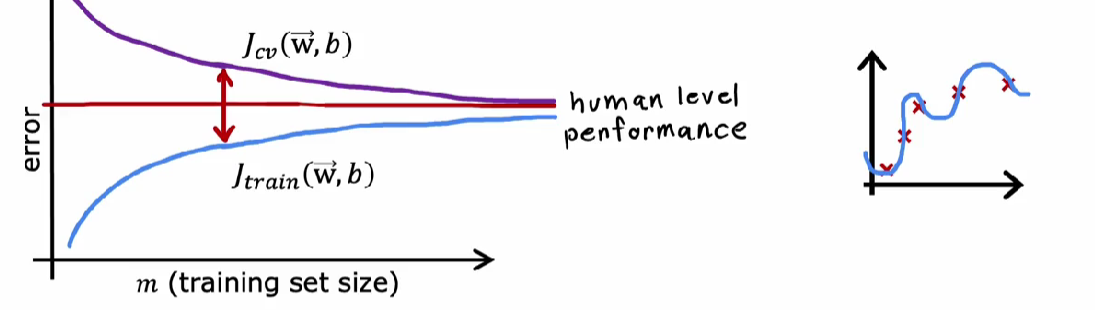

### 2.6.6 Common Fixes

| Strategies for High Variance (Overfitting)                          | Strategies for High Bias                   |
|--------------------------------------------------------------------|--------------------------------------------|
| Add more examples                                                   | Get additional features                     |
| Use a smaller set of features                                       | Add polynomial features                     |
| Increase regularization (lambda)                                    | Decrease regularization (lambda)            |
| Improve data quality                                                | Reduce feature engineering                  |
| Apply feature selection techniques                                  | Increase model complexity                   |
| Use ensemble methods (e.g., bagging, boosting)                      | Explore more advanced algorithms            |
| Implement early stopping during model training                      | Collect more diverse and representative data |
| Perform cross-validation and hyperparameter tuning                  | Analyze and address data imbalance          |
| Regularize individual layers in deep learning models (e.g., dropout)| Refine preprocessing techniques             |


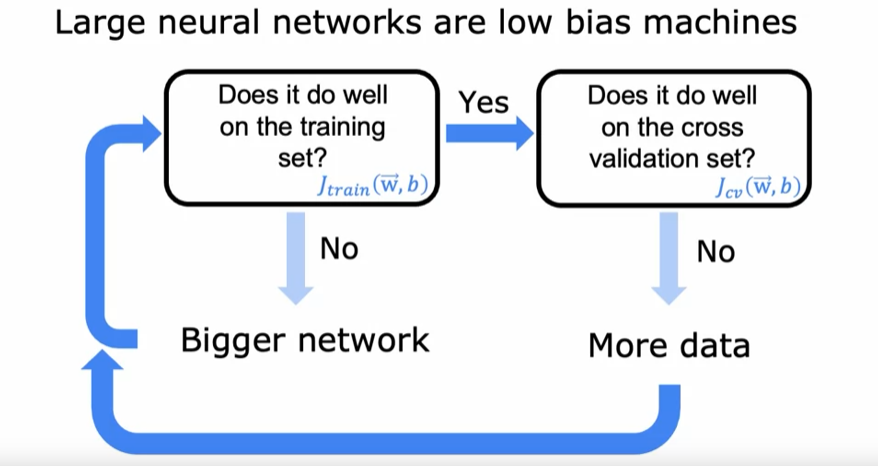

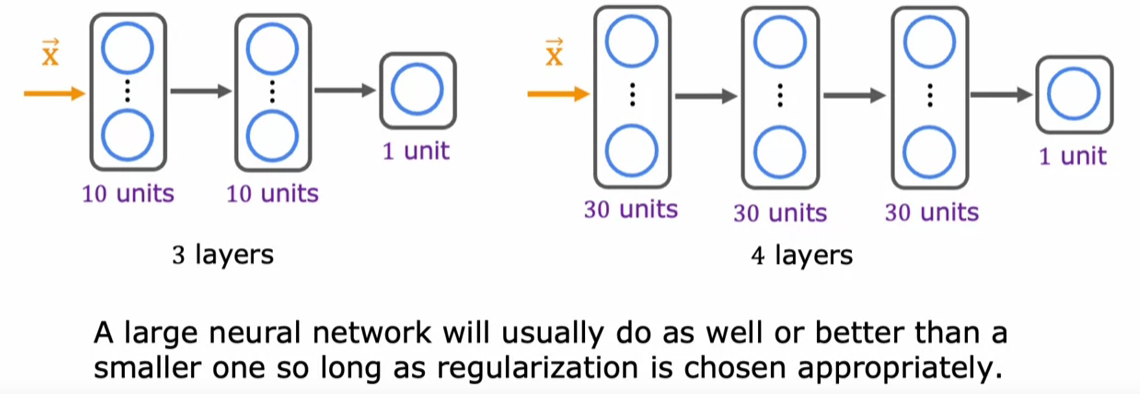

### 2.6.7 Regularization in TensorFlow

In [ ]:
# Create a dense layer with L2 regularization
dense_layer = tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01))

# Build the model and add the dense layer
model = tf.keras.Sequential([
    dense_layer,
    # Add more layers...
])



| Regularization Technique | Description                                                                                   | Application                                                      | Implementation in TensorFlow                                |
|--------------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------|------------------------------------------------------------|
| L2 Regularization        | Adds a penalty term to the loss function <br> based on the squared weights (L2 norm).             | General regularization technique to <br>prevent overfitting         | `tf.keras.regularizers.l2(l=0.01)`                          |
| L1 Regularization        | Adds a penalty term to the loss function<br> based on the absolute values of the <br> weights (L1 norm).| Promotes sparsity and feature selection                         | `tf.keras.regularizers.l1(l=0.01)`                          |
| Dropout                  | Randomly sets a fraction of input units <br> to zero during each training step.                     | Mitigates overfitting and improves model<br>generalization          | `tf.keras.layers.Dropout(rate=0.2)`                        |
| Batch Normalization      | Normalizes the inputs of each layer in a <br> neural network, making the training <br> process more stable.  | Helps stabilize and accelerate training,<br> improves generalization | `tf.keras.layers.BatchNormalization()`                     |
| ElasticNet Regularization| Combines L1 and L2 regularization by<br> adding a penalty term that is a linear<br> combination of both L1 and L2 norms. | Useful when there is a need for both L1 <br>and L2 regularization simultaneously | `tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)` |


## 2.7  Iterative Loop of Machine Learning Development

1. **Data Collection:** Acquire and preprocess the relevant data that will be used for training and evaluating the model. This may involve cleaning the data, handling missing values, and performing feature engineering.

2. M**odel Selection and Design:** Choose the appropriate machine learning algorithm or model architecture based on the problem at hand. Consider factors such as the nature of the data, the complexity of the problem, and the available resources.

3. **Training:** Split the data into training and validation sets. Use the training set to fit the model to the data by adjusting the model's parameters or weights iteratively. This step involves optimization techniques such as gradient descent or backpropagation.

4. **Evaluation:** Assess the performance of the model on the validation set to measure its generalization ability. Evaluate metrics such as accuracy, precision, recall, or mean squared error, depending on the nature of the problem.

5. M**odel Adjustment:** Analyze the model's performance and identify areas for improvement. Based on the evaluation results, fine-tune the model by adjusting hyperparameters, trying different architectures, or applying regularization techniques to combat overfitting.

6. **Testing:** Once the model is optimized and performs well on the validation set, evaluate its performance on an unseen test set. This step provides an estimate of how the model might perform in real-world scenarios.

7. **Iteration:** Based on the results obtained from the testing phase, iterate and refine the model further if necessary. This may involve going back to previous steps, such as adjusting the data preprocessing, selecting different features, or trying alternative algorithms.

The iterative loop continues until a satisfactory model performance is achieved, balancing considerations such as accuracy, generalization, and computational efficiency.



### 2.7.1 Data Collection

> 1. **Data Augmentation:**
> Data augmentation involves creating new training examples by applying various transformations to the existing data. For example, in image classification, you can apply random rotations, translations, flips, and zooms to generate additional training images. Data augmentation helps increase the diversity of the training set and makes the model more robust to variations in the input data.
>
> 2. **Collecting More Data:**
> Gathering additional data from various sources can help improve the performance of machine learning models. This can involve manually collecting more labeled examples or acquiring data from external datasets that are relevant to the problem domain. Increasing the size of the training set can enhance the model's ability to generalize.
>
> 3. **Synthetic Data Generation:**
> In some cases, it may be feasible to generate synthetic data that closely resembles the real data. This can be useful when collecting more real-world data is expensive or time-consuming. Synthetic data can be generated using techniques such as simulation, procedural generation, or data synthesis algorithms.
>
> 4. **Active Learning:**
> Active learning is a technique where the model is trained on a small initial labeled dataset, and then it actively selects the most informative unlabeled examples for annotation. This process involves iteratively querying an oracle (e.g., human expert) to label the selected examples. By actively selecting the most informative instances for labeling, active learning can reduce the labeling effort while achieving comparable performance to models trained on fully labeled datasets.
>
> 5. **Transfer Learning:** Transfer learning leverages knowledge gained from one task or dataset and applies it to a different but related task or dataset. Instead of starting from scratch, transfer learning allows the model to benefit from pre-trained models or features extracted from a large-scale dataset. This can be especially useful when the target dataset is small or when there is a lack of labeled examples.


### 2.7.2 Transfer Learning

Transfer learning is a machine learning technique where a pre-trained model, typically trained on a large-scale dataset, is used as a starting point for solving a different but related task. Instead of training a model from scratch, transfer learning allows us to leverage the knowledge and representations learned by the pre-trained model, which can significantly speed up training and improve performance, especially when the new task has limited labeled data.

**The general process of transfer learning :**

1. **Selecting a Pre-trained Model:** Choose a pre-trained model that has been trained on a large and diverse dataset. The choice of the pre-trained model depends on the problem domain and the similarity between the pre-trained task and the target task.

2. **Removing the Last Fully Connected Layer:** The last layer of the pre-trained model, often a fully connected layer, is typically specific to the original task. It needs to be removed or replaced to adapt the model to the new task.

3. **Feature Extraction:** Freeze the weights of the pre-trained layers and extract features from the previous layers. These features serve as inputs to a new classifier or a set of layers that are specific to the new task.

4. **Adding a New Classifier:** Add a new set of layers on top of the feature extractor to learn task-specific features. These layers are usually randomly initialized, and their weights are updated during training.

5. **Training:** Train the model using the new dataset specific to the target task. Since the pre-trained layers are frozen, only the newly added layers are updated during training. This process helps the model learn task-specific patterns while retaining the knowledge from the pre-trained layers.

6. **Fine-tuning (Optional):** Optionally, after the new layers have been trained, you can unfreeze some of the pre-trained layers and allow them to be updated during training. This fine-tuning step enables the model to adjust its representations to better fit the new task. Fine-tuning is typically performed on a smaller learning rate to avoid overfitting.

## 2.8 Decision Trees

### 2.8.1 Introduction & Basic Concepts

Decision trees are powerful and widely used machine learning models that can be applied to both classification and regression tasks. They provide a clear and interpretable way of making decisions based on a set of input features.

**Structure of Decision Trees:**
> A decision tree is a hierarchical structure composed of nodes and branches. It starts with a root node and branches out into internal nodes and leaf nodes. Each internal node represents a decision based on a specific feature, and each leaf node represents a class label or a predicted value.


```
                                      Is it Sunny?   <----- Root Node
                                       /         \
                                  Yes /           \ No
                                     /             \
Internal Node-->         Humidity <= 75           Don't Play
                           /         \
Internal Node-->      Wind <= 10     Play
                       /     \
                  Play    Don't Play
Leaf Nodes-----> Tennis    Tennis
```

**Splitting Criteria:**
>To construct a decision tree,  need  metrics to determine how to split the data at each internal node. Commonly used splitting criteria include:
> - **Gini impurity:** Measures the probability of misclassifying a randomly chosen element if it is randomly labeled according to the distribution of classes in the node.
> - **Entropy:** Measures the average amount of information needed to classify a sample based on the class distribution in the node.
> - **Information gain:** Measures the reduction in entropy or impurity achieved by splitting the data based on a particular feature.

**Training Process:**
> The process of training a decision tree involves recursively partitioning the data based on the selected splitting criteria until a stopping condition is met. This condition can be the depth of the tree, the number of samples in a leaf node, or other predefined constraints. The main steps of the training process are as follows:
> - Select the best feature to split the data based on the chosen criterion.
> - Create a new internal node with the chosen feature and its associated decision rule.
> - Split the data into subsets based on the feature values.
> - Repeat the process for each subset by recursively applying the above steps until the stopping condition is met.
> - Assign a class label or predicted value to each leaf node.

**Handling Categorical and Numerical Features:**
> Decision trees can handle both categorical and numerical features. For categorical features, the splitting process involves creating branches for each possible feature value. For numerical features, the tree can utilize threshold-based splits to compare if a sample's feature value is greater or smaller than a threshold.

**Handling Missing Values:**
> Decision trees can handle missing values by employing different strategies. One common approach is to create a separate branch for samples with missing values, allowing them to be classified separately. Another option is to assign a probability distribution to the missing values and distribute them among the existing branches based on the proportion of samples.

**Handling Overfitting:**
> Decision trees tend to overfit the training data, capturing noise and irrelevant details. To mitigate overfitting, various techniques can be applied, including:
> - **Pruning:** Removing unnecessary branches or entire subtrees based on metrics like reduced error pruning or cost-complexity pruning.
> - **Setting constraints:** Limiting the depth of the tree or the number of samples required to create a split.
> - **Ensemble methods:** Combining multiple decision trees through techniques like random forests or gradient boosting to improve generalization.

**Interpretability and Visualization:**
> One significant advantage of decision trees is their interpretability. The decision rules at each node can be easily understood and explained. Additionally, decision trees can be visualized graphically, making it easier to grasp the flow of decisions and feature importance.

**Applications:**
Decision trees have a wide range of applications in machine learning, including:
> - **Classification problems:** Decision trees can be used for tasks like email spam detection, sentiment analysis, medical diagnosis, and credit scoring.
> - **Regression problems:** Decision trees can predict numerical values and are useful for tasks like housing price prediction, stock market analysis, and demand forecasting.
> - **Feature selection:** Decision trees can assist in identifying the most informative features by evaluating their importance based on how much they contribute to the overall tree structure.


### 2.8.2 Entropy

Let $P_i$ be the fraction of the selected sample(devided &) which satisfies the required criteria. Then the entropy $H_{P_i}$ is defined as,<br>

$$H_{P_i} = - P_i log_2(P_i)-(1-P_i)log_2(1-P_i)$$

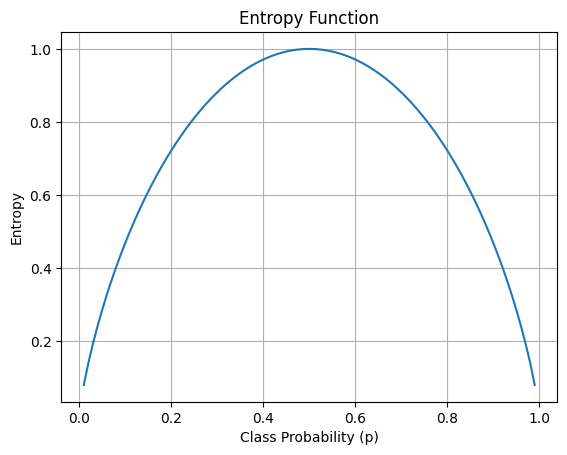

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

probs = np.linspace(0.01, 0.99, 100)  # Generating 100 probability values from 0.01 to 0.99
entropies = [entropy(p) for p in probs]  # Calculating entropy for each probability

plt.plot(probs, entropies)
plt.xlabel('Class Probability (p)')
plt.ylabel('Entropy')
plt.title('Entropy Function')
plt.grid(True)
plt.show()


**Example :**<br>
Consoder a decision tree which is expected to decide a given image is a cat or not.<br>

$P_i$ is defined as the sample fraction of cats in the devided sample.<br><br>
The information gain of a node is defined as<br> $$I_{gain} = H_{Root\ Node} -(\frac{Sample\ count \ of \ left \ branch} {Total\ sample \ count\ of\ the\ node}H_{P_{left}}+ \frac{Sample\ count \ of \ right \ branch}{Total\ sample \ count\ of\ the\ node}H_{P_{right}}) $$

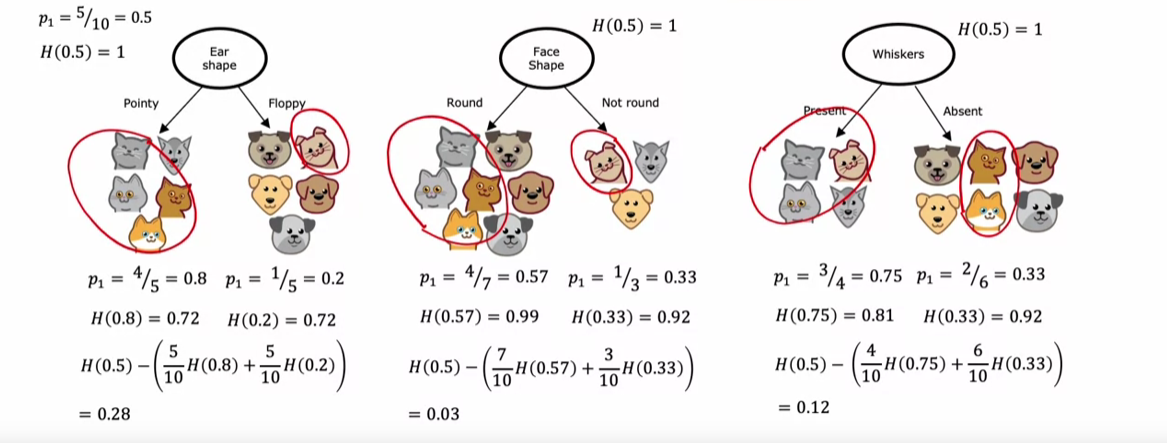

Steps to build the tree:
1. **Calculate the entropy of the initial dataset (the root node)**
   - Compute the class distribution by counting the number of examples belonging to each class.
   - Calculate the probability of each class.
   - Use these probabilities to compute the entropy using the entropy formula.

2. **Iterate over each feature in the dataset and calculate the information gain:**
   - For each feature, calculate the entropy of the dataset after splitting on that feature.
   - Compute the information gain by subtracting the weighted average of the entropies from the entropy of the current dataset.
   - The information gain represents the reduction in entropy achieved by splitting the data on a particular feature.

3. **Choose the feature with the highest information gain** as the best feature to split on.

4. Create a node in the decision tree for the chosen feature.

5. Split the dataset based on the values of the chosen feature.

6. Recursively repeat steps 1-5 for each subset created by the split until a stopping criterion is met. This could be reaching a certain depth, having a minimum number of samples in a node, or reaching a pure node (all samples belong to the same class).

7. Assign the most common class label of the samples in a leaf node as the predicted class for that node.

8. Continue growing the decision tree until the stopping criterion is met for all branches.


### 2.8.3 Sampling With Replacement

Sampling with replacement is a technique commonly used in machine learning and statistics. In this sampling method, each sample from a dataset is randomly selected, and after being selected, it is placed back into the dataset. This means that the same sample can be selected multiple times in a single iteration of the sampling process.

Sampling with replacement has several applications,:

1. **Bootstrap Sampling:** Bootstrap sampling is a resampling technique used to estimate statistical properties of a population. By sampling with replacement from the original dataset, multiple bootstrap samples can be created, allowing for the estimation of confidence intervals and assessing the variability of a statistic.

2.** Bagging (Bootstrap Aggregating):** Bagging is an ensemble learning technique that involves training multiple models on bootstrap samples and aggregating their predictions. Each model is trained on a different bootstrap sample, allowing for a diverse set of models that collectively produce a more robust and accurate prediction.

3. **Random Forests:** Random Forests is an ensemble method that combines decision trees by training each tree on a bootstrap sample. This approach ensures diversity among the trees and reduces overfitting. The final prediction is obtained by aggregating the predictions of all the trees, typically through majority voting for classification or averaging for regression.


### 2.8.4 Multiple Decision Trees

Using multiple decision trees together is a common technique in machine learning known as ensemble learning. Ensemble methods aim to combine the predictions of multiple models to improve overall performance and generalization. Two popular ensemble methods involving decision trees are Random Forests and Gradient Boosting.

1. **Random Forests:**
   - Random Forests combine multiple decision trees by training each tree on a randomly sampled subset of the training data (bootstrap samples) and a subset of features.
   - Each tree in the Random Forest is trained independently, and the final prediction is made by aggregating the predictions of all the trees (e.g., by majority voting for classification or averaging for regression).
   - Random Forests are effective at reducing overfitting, handling high-dimensional data, and providing estimates of feature importance based on the average impurity decrease across the trees.
   - They are computationally efficient and can parallelize the training process.

2. **Gradient Boosting:**
   - Gradient Boosting is an ensemble method that sequentially builds decision trees, where each subsequent tree is trained to correct the mistakes of the previous trees.
   - Each tree is trained on the residuals (or gradients) of the previous predictions, minimizing a loss function.
   - The final prediction is obtained by summing the predictions of all the trees, each multiplied by a learning rate that controls the contribution of each tree.
   - Gradient Boosting can handle complex relationships and perform well in a wide range of applications.
   - It typically requires careful hyperparameter tuning and may be computationally more expensive than Random Forests.


| Aspect              | Random Forests                           | Gradient Boosting                              |
|---------------------|------------------------------------------|------------------------------------------------|
| Ensemble Method     | Yes                                      | Yes                                            |
| Number of Models    | Multiple decision trees                  | Multiple decision trees                        |
| Training Process    | Independent tree training                | Sequential tree training                       |
| Sampling Technique  | Sampling with replacement (Bootstrap)    | No sampling with replacement                   |
| Model Independence | Each tree is trained independently       | Each tree corrects the mistakes of previous trees |
| Overfitting         | Less prone to overfitting                | More prone to overfitting                      |
| Diversity           | Trees trained on random subsets of data  | Trees trained on residuals of previous predictions |
| Prediction Method   | Voting (classification), averaging (regression) | Sum of predictions with weighted contribution |
| Interpretability    | Moderate interpretability                | Moderate interpretability                       |
| Handling Outliers   | Less sensitive to outliers               | More sensitive to outliers                      |
| Hyperparameter Tuning | Multiple hyperparameters to tune       | Multiple hyperparameters to tune               |
| Computational Efficiency | Faster training and prediction     | Slower training, but efficient prediction       |
| Feature Importance  | Based on average impurity decrease      | Based on impact on loss function                |
| Dataset Size        | Can handle large datasets                | Smaller datasets may suffice                    |
| Complexity          | Relatively simpler to implement          | More complex to implement                       |


### 2.8.5 Random Forest Algorithm

1. **Data Preparation:**
   - The algorithm starts with a labeled dataset consisting of features (input variables) and corresponding target variables (output labels).

2. **Bootstrap Sampling:**
   - Random Forest uses a technique called bootstrap sampling with replacement. It randomly selects subsets of the original dataset by sampling with replacement, resulting in multiple training datasets of equal size to the original data.
   - Each subset is called a bootstrap sample, and it preserves the same number of data instances as the original dataset but may contain duplicates and miss some original instances.

3. **Decision Tree Construction:**
   - For each bootstrap sample, a decision tree is constructed independently.
   - At each node of the decision tree, a feature subset is randomly selected from the available features.
   - The tree is grown recursively by splitting the data based on the selected feature and its threshold, aiming to minimize impurity or maximize information gain.

4. **Ensemble of Decision Trees:**
   - The Random Forest algorithm creates an ensemble of decision trees by repeating the above step for a specified number of trees (n_estimators).
   - Each decision tree in the ensemble is built using a different bootstrap sample and a different subset of features.

5. **Prediction:**
   - To make a prediction using the Random Forest, each decision tree in the ensemble independently predicts the output for a given input.
   - For classification tasks, the final prediction is determined by majority voting, where the class that receives the most votes across all trees is chosen.
   - For regression tasks, the final prediction is obtained by averaging the predictions of all the trees.


In [ ]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def split(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]
        return X_left, y_left, X_right, y_right

    def find_best_split(self, X, y):
        best_split = None
        best_criterion_value = float('inf')
        n_features = X.shape[1]

        for feature_index in range(n_features):
            unique_values = np.unique(X[:, feature_index])
            for value in unique_values:
                X_left, y_left, X_right, y_right = self.split(X, y, feature_index, value)
                criterion_value = self.gini(y_left) + self.gini(y_right)
                if criterion_value < best_criterion_value:
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': value,
                        'X_left': X_left,
                        'y_left': y_left,
                        'X_right': X_right,
                        'y_right': y_right
                    }
                    best_criterion_value = criterion_value

        return best_split

    def build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_value = np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        split = self.find_best_split(X, y)
        if split is None:
            leaf_value = np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        left_subtree = self.build_tree(split['X_left'], split['y_left'], depth+1)
        right_subtree = self.build_tree(split['X_right'], split['y_right'], depth+1)

        return {
            'leaf': False,
            'feature_index': split['feature_index'],
            'threshold': split['threshold'],
            'left_subtree': left_subtree,
            'right_subtree': right_subtree
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, x):
        node = self.tree
        while not node['leaf']:
            if x[node['feature_index']] <= node['threshold']:
                node = node['left_subtree']
            else:
                node = node['right_subtree']
        return node['value']

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self.predict_sample(x))
        return np.array(predictions)


class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            estimator = DecisionTree(max_depth=self.max_depth)
            sample_indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sampled, y_sampled = X[sample_indices], y[sample_indices]
            estimator.fit(X_sampled, y_sampled)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            predictions.append(estimator.predict(X))
        predictions = np.array(predictions)
        return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)


### 2.8.6 Regression VS Decision Trees



| Aspect           | Regression                    | Decision Trees                     |
|------------------|-------------------------------|------------------------------------|
| Type of problem  | Supervised learning           | Supervised learning                |
| Target variable  | Continuous                    | Continuous or categorical          |
| Output           | Predicted numerical value     | Predicted numerical or categorical |
| Interpretability | Moderate interpretability     | High interpretability              |
| Handling outliers| Sensitive to outliers         | Less sensitive to outliers         |
| Non-linear       | Can handle non-linear patterns| Can handle non-linear patterns     |
| Overfitting      | Prone to overfitting          | Prone to overfitting               |
| Data requirements| Large dataset for stability   | Can work with smaller datasets     |
| Computational efficiency | Fast training and prediction | Training can be computationally expensive |
| Feature importance| Coefficients indicate feature <br> importance | Splitting decisions indicate feature importance |
| Handling missing values | Can handle missing values<br> using imputation techniques | Can handle missing values internally by treating <br>them as separate categories or using surrogate<br> splits |
| Ensemble methods | Can be used in ensemble<br> methods like gradient boosting <br>or random forests | Can be used as base models in ensemble methods<br> like random forests or boosting |


##2.9 XGBoost For Classification and Regression

### 2.9.1 Introduction

XGBoost (eXtreme Gradient Boosting) is an optimized and powerful machine learning algorithm that belongs to the gradient boosting family. It is widely used in various data science competitions and is known for its exceptional performance and scalability. XGBoost builds a strong predictive model by combining the predictions of multiple weak models in an ensemble.

Here are the key features and concepts of XGBoost:

1. **Gradient Boosting:**
   - XGBoost is based on the gradient boosting framework, which sequentially adds weak models (decision trees) to the ensemble to correct the errors made by previous models.
   - It focuses on minimizing a loss function by iteratively fitting new models to the negative gradients of the loss function.

2. **Regularized Learning Objective:**
   - XGBoost utilizes a regularized learning objective that consists of two components: a loss function and a regularization term.
   - The loss function measures the discrepancy between predicted and actual values, while the regularization term controls the complexity of the model and helps prevent overfitting.

3. **Decision Trees as Weak Learners:**
   - XGBoost primarily uses decision trees as the base or weak learners in its ensemble.
   - Decision trees are constructed in a greedy manner, where splits are chosen to minimize the loss function, using techniques such as weighted quantile sketch for efficient computation.

4. **Gradient-Based Optimization:**
   - XGBoost employs a gradient-based optimization algorithm to find the best model parameters during the training process.
   - It utilizes second-order gradient information for more accurate and efficient optimization.

5. **Ensemble Construction:**
   - XGBoost combines the predictions of multiple weak models to form a strong ensemble model.
   - Each subsequent weak model is trained to minimize the residual errors of the ensemble so far, using gradient information and regularization.

6. **Regularization Techniques:**
   - XGBoost incorporates various regularization techniques to prevent overfitting and improve generalization.
   - Regularization terms, such as L1 and L2 regularization, control the complexity of the individual models.
   - Shrinkage, or learning rate, is used to scale the contribution of each weak model, providing better control over model updates.

7. **Feature Importance:**
   - XGBoost provides a measure of feature importance based on the number of times a feature is used in the ensemble and the average gain of splits using that feature.
   - Feature importance can help identify the most influential features in the prediction process.

8. **Scalability and Performance:**
   - XGBoost is designed for efficiency and scalability, with optimizations for both training and prediction stages.
   - It supports parallelization, distributed computing, and GPU acceleration to handle large datasets and speed up computation.


### 2.9.2 XGBoost Vs TensorFlow


|        | XGBoost                                                     | TensorFlow                                                  |
| ------ | ----------------------------------------------------------- | ----------------------------------------------------------- |
| Purpose/Usage  | Gradient boosting algorithm for supervised learning tasks   | General-purpose machine learning framework                  |
| Learning Paradigm | Supervised learning using ensemble of decision trees       | Deep learning and neural networks                           |
| Algorithm Type   | Gradient boosting                                           | Neural networks and deep learning                          |
| Model Representation | Ensemble of decision trees                                  | Artificial neural networks                                  |
| Strengths         | - Excellent performance in structured/tabular data analysis <br> - Robust and efficient algorithm <br> - Handles both classification and regression tasks | - Versatile and powerful, suitable for a wide range of machine learning tasks <br> - Deep learning capabilities with neural networks <br> - Supports distributed computing and GPU acceleration |
| Weaknesses        | - May not perform as well on unstructured data or <br>image/audio tasks <br> - Limited ability to capture complex patterns compared<br> to neural networks | - Steeper learning curve, especially for complex tasks <br> - Requires more data and computational resources <br> - May be overkill for simple tasks |
| Flexibility       | Offers several hyperparameters to customize the model<br> and control regularization | Highly flexible framework with extensive customization options |
| Feature Importance | Provides feature importance based on the model's internal <br>feature usage and split gain | Does not provide explicit feature importance out of the box |
| Scalability       | Efficient and scalable for large datasets                    | Scalable for large datasets, especially with distributed computing |
| Ease of Use       | Relatively easier to use and implement                        | More complex setup and usage, requires familiarity with neural networks and TensorFlow |
| Community Support | Active and growing community with extensive resources        | Large and active community with vast resources and documentation |
| Production Deployment | Suitable for production deployment, especially in structured <br>data scenarios | Suitable for production deployment, especially for complex deep learning tasks |



### 2.9.3 Syntax For Regression



```
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBRegressor model
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

```








| Parameter              | Explanation                                                  | Code Example                                 | Effects when Increasing                  | Effects when Decreasing                  |
|------------------------|--------------------------------------------------------------|----------------------------------------------|------------------------------------------|------------------------------------------|
| objective              | The loss function to be optimized during training.            | `objective='reg:squarederror'`               | N/A                                      | N/A                                      |
| learning_rate (eta)    | Step size shrinkage used in the boosting process.            | `learning_rate=0.1`                          | Smoother convergence, slower training    | Faster convergence, potential overfitting |
| max_depth              | Maximum depth of a tree.                                     | `max_depth=3`                                | More complex models, potential overfitting | Simpler models, potential underfitting    |
| subsample              | Subsample ratio of the training instances.                    | `subsample=0.8`                              | Potential increase in model bias         | Potential increase in model variance      |
| colsample_bytree       | Subsample ratio of columns when constructing each tree.       | `colsample_bytree=0.8`                       | Potential increase in model variance      | Potential increase in model bias         |
| gamma                  | Minimum loss reduction required to make a further partition.  | `gamma=0`                                    | Potential increase in model complexity    | Potential decrease in model complexity    |
| min_child_weight       | Minimum sum of instance weight needed in a child.             | `min_child_weight=1`                         | Potential increase in model complexity    | Potential decrease in model complexity    |
| reg_lambda (lambda)    | L2 regularization term on weights.                           | `reg_lambda=1`                              | Potential decrease in model variance      | Potential increase in model variance      |
| reg_alpha (alpha)      | L1 regularization term on weights.                           | `reg_alpha=0`                               | Potential decrease in model variance      | Potential increase in model variance      |
| num_boost_round        | Number of boosting rounds (trees) to build.                   | `num_boost_round=100`                        | N/A                                      | N/A                                      |

### 2.9.4 Syntax For Classification

```
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBClassifier model
model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

```

### 2.9.5 Loss Functions in XGBoost



| Loss Function        | Description                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------|
| `binary:logistic`    | Binary classification using logistic regression.                                                         |
| `binary:logitraw`    | Binary classification without applying the sigmoid function.                                               |
| `binary:hinge`       | Binary classification using hinge loss.                                                                   |
| `multi:softmax`      | Multiclass classification using softmax regression.                                                       |
| `multi:softprob`     | Multiclass classification returning probabilities for each class.                                         |
| `rank:pairwise`      | Pairwise ranking objective for ranking tasks.                                                             |
| `reg:linear`         | Linear regression.                                                                                        |
| `reg:logistic`       | Logistic regression.                                                                                      |
| `reg:gamma`          | Gamma regression.                                                                                          |
| `reg:tweedie`        | Tweedie regression.                                                                                        |


# 3. Unsupervised Learning, Recommenders, Reinforcement Learning

## 3.1 Unsupervised Learning

Unsupervised learning is a category of machine learning where the goal is to discover patterns, structures, or relationships in a dataset without explicit target labels. Unlike supervised learning, where the algorithm learns from labeled examples to make predictions or classifications, unsupervised learning focuses on finding underlying patterns or representations within the data.

The main objective of unsupervised learning is to explore the inherent structure of the data and extract meaningful insights without any prior knowledge or guidance. It is often used for exploratory data analysis, data preprocessing, dimensionality reduction, and clustering.

There are two primary types of unsupervised learning techniques:

1. Clustering: Clustering algorithms group similar data points together based on their inherent similarities or distances in the feature space. The algorithms aim to identify distinct groups or clusters within the data, allowing us to gain insights into natural groupings or patterns. Common clustering algorithms include K-means, hierarchical clustering, and DBSCAN.

2. Dimensionality Reduction: Dimensionality reduction techniques aim to reduce the number of features or variables in a dataset while preserving important information. They help overcome the curse of dimensionality and simplify complex data representations. Principal Component Analysis (PCA) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are popular dimensionality reduction methods.

Unsupervised learning has various real-world applications. For instance:

- Customer Segmentation: Clustering algorithms can group customers with similar behavior or preferences for targeted marketing campaigns.
- Anomaly Detection: Unsupervised learning can help identify unusual or anomalous data points that deviate from the norm, such as detecting fraud in financial transactions or detecting faults in industrial processes.
- Recommendation Systems: Collaborative filtering is an unsupervised learning approach used in recommender systems to suggest relevant items based on user behavior and preferences.
- Data Visualization: Dimensionality reduction techniques enable visualizing high-dimensional data in lower dimensions, aiding in data exploration and pattern discovery.


## 3.2 Clustering

### 3.2.1 Popular Clustering Algorithms



| Algorithm        | Explanation           | Pros  | Cons  |
| ------------- |-------------| -----| -----|
| K-means      | Divides data into predefined number of <br> clusters by minimizing the within-cluster<br> sum of squares. | - Simple and computationally efficient.<br>- Scales well to large datasets.<br>- Easy to interpret results.<br>- Works well with spherical clusters. | - Requires the number of clusters to be specified in advance.<br>- Sensitive to initialization and can get stuck in local optima.<br>- Assumes clusters with similar sizes and variances. |
| Hierarchical Clustering      | Builds a hierarchy of clusters by either <br>agglomerative (bottom-up) or divisive <br>(top-down) approach. | - Does not require the number of clusters to be specified in advance.<br>- Provides a dendrogram for visual interpretation.<br>- Can capture clusters at different scales. | - Computationally expensive for large datasets.<br>- Difficult to interpret for a large number of data points.<br>- Sensitive to the choice of distance metric and linkage method. |
| DBSCAN (Density-Based <br> Spatial Clustering of <br> Applications with Noise) | Groups together data points that are <br> densely connected, forming dense regions<br> separated by sparser areas. | - Does not require the number of clusters to be specified in advance.<br>- Can discover clusters of arbitrary shape.<br>- Robust to outliers and noise.<br>- Does not assume clusters with similar sizes or densities. | - Requires tuning of distance and density parameters.<br>- Can struggle with datasets of varying densities or high-dimensional data.<br>- Not suitable for clusters with varying densities. |
| Gaussian Mixture Models <br>(GMM) | Represents each cluster as a probability <br>distribution modeled by a mixture of Gaussian<br> distributions. | - Can capture complex cluster shapes and handle overlapping clusters.<br>- Provides probabilistic assignments to data points.<br>- Can estimate missing or incomplete data using the expectation-maximization algorithm. | - Requires the number of components or clusters to be specified in advance.<br>- Sensitive to the initialization of parameters.<br>- Computationally expensive for large datasets.<br>- Converges to local optima. |


### 3.2.2 K-Means Algorithm

Certainly! The k-means algorithm is an iterative clustering algorithm that aims to partition a given dataset into k distinct clusters.

**k-means algorithm workflow:**

> 1. Initialization:
>    - Choose the number of clusters, k, that  want to identify in the dataset.
>    - Randomly initialize k cluster centroids as the initial positions of the cluster centers.
>
> 2. Assignment Step:
>    - For each data point in the dataset, calculate the distance to each of the k cluster centroids.
>    - Assign the data point to the cluster with the nearest centroid, forming k clusters.
>
> 3. Update Step:
>    - Recalculate the cluster centroids by taking the mean of all data points assigned to each cluster.
>    - The new centroid positions represent the updated cluster centers.
>
> 4. Repeat Steps 2 and 3:
>    - Iterate the assignment step and the update step until convergence is achieved.
>    - Convergence occurs when the cluster assignments no longer change significantly or a maximum number of iterations is reached.
>
> 5. Final Result:
>    - The algorithm converges to a final set of cluster centroids that represent the centers of the clusters.
>    - Each data point is assigned to the cluster whose centroid it is closest to.
>



The k-means algorithm is a popular unsupervised learning method used for clustering data into k distinct groups. In this note, we will discuss the mathematical representations of the k-means algorithm, including notations, the algorithm, and the cost function.<br>

**Notations :**
1. **$c^{(i)}$**  : Index of the cluster to which the training example $x^{(i)}$ is currently assigned.
2. **$\mu_k$** : Cluster centroid k.
3. **$\mu_c(i)$** Cluster centroid of cluster whichthe training example $x^{(i)}$ is aasigned

**Algorithm Overview**

The k-means algorithm can be summarized as follows:

> 1. item Initialize the centroids: randomly select $k$ data points as the initial centroids.
> 2. item Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance).
>3. item Update the centroids by computing the mean of all data points assigned to each centroid.
>4. item Repeat steps 2 and 3 until convergence (i.e., when the centroids no longer change significantly or after a certain number of iterations).

**Cost Function**

The cost function of the k-means algorithm, also known as the distortion or within-cluster sum of squares (WCSS), measures the quality of the clustering solution. It is defined as the sum of the squared Euclidean distances between each data point and its assigned centroid: <br>

$
J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_k) =\frac{1}{m} \sum_{i=1}^{m}  \|x^{(i)} - \mu_c(i)\|^2
$


The goal of the k-means algorithm is to minimize the cost function by finding the optimal cluster assignments and centroids.




####3.2.2.1 Initializing the K


> 1. **Elbow Method:**
> The Elbow Method is a commonly used approach to estimate the optimal value of k. It involves plotting the within-cluster sum of squares (WCSS) against different values of k. WCSS represents the sum of squared distances between each data point and the centroid of its assigned cluster. The idea is to select the value of k where the WCSS decreases significantly and starts to level off. This "elbow" point indicates a good trade-off between the number of clusters and the compactness of the clusters.
>
> 2. **Silhouette Score:**
> The Silhouette score is a metric that measures the quality of clustering. It evaluates how well each data point fits within its assigned cluster compared to other clusters. For different values of k, calculate the average Silhouette score across all data points. The value of k that maximizes the Silhouette score indicates better-defined and well-separated clusters. Higher Silhouette scores imply more distinct and accurate clustering.
>
> 3. **Gap Statistic:**
> The Gap Statistic method compares the within-cluster dispersion for different values of k to a reference null distribution. It calculates the gap between the observed within-cluster dispersion and the expected dispersion under the null distribution. The optimal value of k corresponds to the largest gap. This method helps identify the value of k that yields clusters with greater separation and coherence.
>
> 4. **Domain Knowledge:**
> Leverage any domain knowledge or prior understanding of the data to guide the selection of k. Consider any known natural groupings or expected number of clusters based on the specific characteristics of the data. Expert knowledge can provide valuable insights and initial estimates for choosing the appropriate value of k.
>
> 5. **Visualization:**
> Visualize the data and resulting clusters for different values of k. Utilize scatter plots, heatmaps, or other suitable visualizations to assess the quality and interpretability of the clusters. Look for a value of k that creates meaningful and distinct clusters without excessive overlap or mixing. Visual inspection can provide valuable intuition about the optimal number of clusters.
>
> 6. **Cross-Validation:**
> Split the dataset into training and validation subsets. Apply the k-means algorithm with different values of k to the training data and evaluate the clustering performance on the validation set using appropriate metrics (e.g., accuracy, F-measure, etc.). Choose the value of k that yields the best performance on the validation set. Cross-validation helps assess the stability and generalizability of the clustering results.
>
> 7. **Computational Constraints:**
> Consider any computational constraints or limitations, such as the size of the dataset and available computing resources. Larger values of k significantly increase the computational complexity and runtime. Take into account the trade-off between the desired level of clustering granularity and computational feasibility.


#### 3.2.2.2 Random Initialization

> 1. **Define the Number of Clusters (k):**
> Before selecting random data points as initial centroids, determine the desired number of clusters (k) for the dataset.
>
> 2. **Set the Random Seed:**
> To ensure reproducibility, set a random seed before selecting random data points. This ensures that the same set of random numbers is generated each time the initialization process is run. Setting the random seed allows for consistent comparisons and analysis of different initializations.
>
> 3. **Randomly Sample Data Points:**
> Randomly sample k data points from the dataset to serve as initial centroids. It is important to ensure that the selected points are distinct and cover the range of variability in the data. One common approach is to use a random sampling method without replacement to ensure each data point is selected only once.
>
> 4. **Ensure Coverage of Feature Space:**
> Check if the randomly selected data points adequately cover the feature space. The centroids should span the entire range of values for each feature or variable. If the initial selection does not provide sufficient coverage, repeat the random sampling step until satisfactory coverage is achieved.
>
> 5. **Assign Random Data Points as Centroids:**
> Assign the randomly selected data points as the initial centroids for the k-means algorithm. Each data point represents the center of its respective cluster at the start of the clustering process.




```python
# Random Initialization Psudo Code

for i = 1 to requiredIterations
{
  Randomly initialize K-means for k examples
  Run K-means
  Compute the cost function
  get the centroids which has the minimum cost function
}
```



#### Gaussian Distribution (normal)

The equation for a Gaussian distribution, also known as the normal distribution, is given by:

$ P(x) = \frac{1}{{\sigma \sqrt{2\pi}}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $


To calculate the standard deviation $\sigma$ of a set of data points,

$ \sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}} $

where:
> - $x_i$ represents the individual data points.
> - $\mu$ represents the mean of the data points.
> - $ n $ represents the total number of data points.


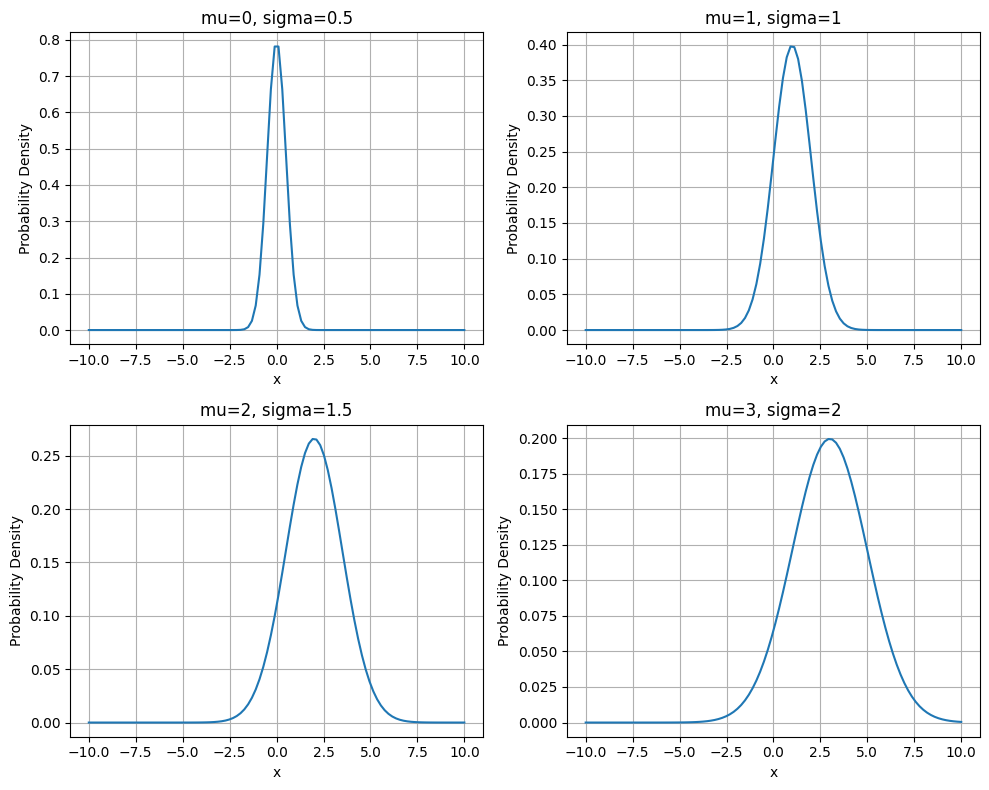

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Define the parameters for the four subplots
mu_values = [0, 1, 2, 3]
sigma_values = [0.5, 1, 1.5, 2]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the subplots and plot the corresponding Gaussian distribution
for i in range(2):
    for j in range(2):
        mu = mu_values[i * 2 + j]
        sigma = sigma_values[i * 2 + j]

        # Calculate the corresponding y values using the Gaussian equation
        y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

        # Plot the Gaussian distribution in the current subplot
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'mu={mu}, sigma={sigma}')
        axs[i, j].set_xlabel('x')
        axs[i, j].set_ylabel('Probability Density')
        axs[i, j].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


####  3.2.2.4 Anomaly detection

Anomaly detection in the k-means algorithm involves identifying data points that deviate significantly from the established clusters. Although k-means is primarily designed for clustering, it can be adapted for anomaly detection by considering data points that do not belong to any cluster or have a high dissimilarity with their assigned cluster centroid.

**Multi-Dimensional Analysis** <br>
let the feature $\overrightarrow{x}^{(i)}$, <br>
$\overrightarrow{x}^{(i)}$   = $
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}$ <br>

Then the probability of $\overrightarrow{x}^{(i)}$ ,<br>
$P(\overrightarrow{x}^{(i)})\ \ \ = \ \ P(x_1\ \ ; \mu_1,\sigma^2_1) \ \times \ P(x_2\ \ ; \mu_2,\sigma^2_2) \ \times \ ... \times \ P(x_n\ \ ; \mu_n,\sigma^2_n)$

**Anomaly Detection Algorithm**


> 1. Choose $n$ features $x_i$ thatmight be indicative of anomalous examples. Let the sample count is $m$ <br>
> $\begin{bmatrix} x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\ x_{2}^{(1)} & x_{2}^{(2)} & \ldots & x_{2}^{(m)} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n}^{(1)} & x_{n}^{(2)} & \ldots & x_{n}^{(m)} \end{bmatrix}$
>
> 2. Calculate $\mu_1....\mu_n,\sigma_1^2...\sigma_n^2$<br> <br>
> $\overrightarrow{\mu} = \frac{1}{m} {\sum_{i=1}^{m}}\overrightarrow{x}^{(i)}$ <br><br>
> $\overrightarrow{\sigma^2} = \frac{1}{m} {\sum_{i=1}^{m}}(\overrightarrow{x}^{(i)} - \overrightarrow{\mu})^2$ <br>
> 3. For given new dataset calculate $P(\overrightarrow{x}^{(i)})$

If $P(\overrightarrow{x}^{(i)})  \  < \epsilon$   then $\overrightarrow{x}^{(i)} $ is an anomaly. <br>
The $\epsilon$ can be decided by using a cross validation test.(Train the model using known non-anomaly data set and small known anomaly dataset)


#### 3.2.2.5 Anomaly detection vs Supervised Learning



| Aspect                       | Anomaly Detection                                                | Supervised Learning                                             |
| ---------------------------- | --------------------------------------------------------------- | --------------------------------------------------------------- |
| Objective                    | Identify rare and unusual instances in a dataset                | Predict the target variable/class based on labeled training data |
| Training Data                | Contains both normal and anomalous instances                    | Labeled instances representing different classes/labels         |
| Labeling Requirement         | Anomalies are often unlabeled and need to be identified          | Requires labeled instances for each class/label                 |
| Algorithm Complexity         | Relies on various algorithms, such as statistical or clustering  | Utilizes algorithms like decision trees, SVM, neural networks    |
| Class Imbalance              | Deals with imbalanced datasets where anomalies are rare         | Can handle class imbalance through sampling techniques          |
| Performance Evaluation       | Metrics like precision, recall, F1-score, AUC-ROC are used      | Metrics like accuracy, precision, recall, F1-score are used     |
| Training Data Availability   | Anomalies can be difficult to obtain and represent real cases    | Requires labeled training data for all classes/labels           |
| Generalizability             | Can adapt to new anomalies or previously unseen patterns        | Performs well on similar instances to the training data         |
| Interpretability             | Often provides insights into unusual instances or system issues | Can provide explanations through feature importance             |
| Applicability                | Useful for fraud detection, intrusion detection, system monitoring, etc. | Applicable to a wide range of classification and regression tasks |
| Data Requirements            | Requires a representative sample of anomalies in the dataset    | Requires a sufficient number of labeled instances for each class |
| Scalability                  | Can handle large-scale datasets but may be computationally intensive | Scalable with efficient algorithms and parallel computing      |


#### 3.2.2.6 Feature Selection for Anomaly Detection

When the destribution of the feature is skewed (Positively or negetively) ,Transform it to the log scale.  $x → log(x+k)$ <br>
Or else do other feature scalings and feature combining.

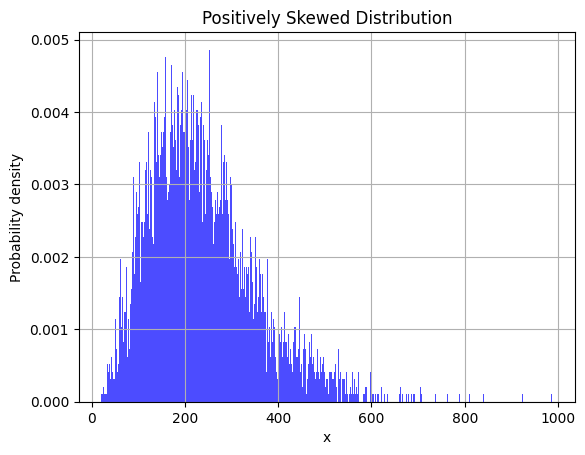

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the positively skewed distribution
mean = 6.0
std_dev = 1.0

# Generate dataset from the positively skewed distribution
data = np.random.normal(mean, std_dev, 5000)
data = np.power(data, 3)  # Apply cube function for positive skewness

# Plot the positively skewed distribution
plt.hist(data, bins=500, density=True, alpha=0.7, color='blue')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Positively Skewed Distribution')
plt.grid(True)
plt.show()


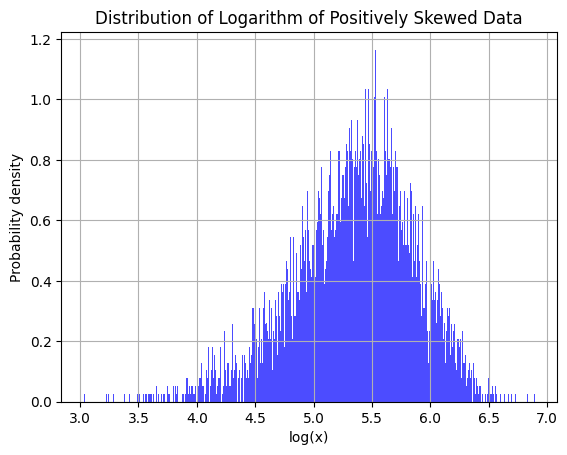

In [ ]:
# Apply logarithm to the data
log_data = np.log(data)

# Plot the distribution of the logarithm of the data
plt.hist(log_data, bins=500, density=True, alpha=0.7, color='blue')
plt.xlabel('log(x)')
plt.ylabel('Probability density')
plt.title('Distribution of Logarithm of Positively Skewed Data')
plt.grid(True)
plt.show()


## 3.3 Recommender Sysytems

Recommender systems are algorithms designed to provide personalized recommendations to users based on their preferences and past behavior. These systems analyze user data, such as previous purchases, ratings, and browsing history, to generate suggestions for items, such as products, movies, or music, that the user may be interested in. By leveraging machine learning techniques and collaborative filtering methods, recommender systems aim to enhance user experience, improve customer satisfaction, and drive sales by offering relevant and tailored recommendations.

## 3.3.1 Recommender System Algorithms



| Algorithm                | Workflow                                               | Strengths                                           | Weaknesses                                          | Applications                                            |
|--------------------------|--------------------------------------------------------|-----------------------------------------------------|-----------------------------------------------------|---------------------------------------------------------|
| Collaborative Filtering | 1. Collect user-item ratings/data.                     | 1. Doesn't require item metadata.                    | 1. Cold start problem for new users/items.           | E-commerce, movie/music recommendations                 |
|                          | 2. Find similar users/items based on ratings.          | 2. Effective for sparse data.                       | 2. Scalability for large user/item datasets.         |                                                         |
|                          | 3. Generate recommendations based on similarity.       | 3. Captures user preferences without explicit data. | 3. Limited to users with similar tastes.             |                                                         |
| Content-Based Filtering  | 1. Collect user and item features/descriptions.        | 1. Handles cold start problem for new items.         | 1. Dependency on accurate item metadata.             | News articles, book recommendations                      |
|                          | 2. Create user and item profiles based on features.    | 2. Provides personalized recommendations.           | 2. Limited ability to discover new items.            |                                                         |
|                          | 3. Recommend items similar to user's preferences.      | 3. Reduces popularity bias.                          | 3. Ignores user preferences beyond item features.    |                                                         |
| Hybrid Recommender       | Combines collaborative and content-based approaches.   | Harnesses strengths of multiple algorithms.          | Requires more computational resources.               | Streaming platforms, personalized news aggregators       |
|                          |                                                        | Provides diverse and accurate recommendations.      |                                                     |                                                         |
|                          |                                                        | Overcomes limitations of individual approaches.      |                                                     |                                                         |
| Matrix Factorization     | Factorizes user-item rating matrix into low-rank       | Effective in handling sparse data.                   | Cold start problem for new users/items.              | Movie recommendations, social media feed customization |
|                          | matrices to capture latent factors.                    | Captures complex user-item relationships.            | Computational complexity for large matrices.         |                                                         |
| Association Rule Mining  | Discovers frequent itemsets and association rules.     | Simple and interpretable recommendations.            | Ignores user preferences and personalization.        | Market basket analysis, product bundling recommendations |
|                          |                                                        | Handles large item catalogs.                         | Limited in capturing complex user preferences.       |                                                         |



 ### 3.3.2 Collaborative Filtering Recommender Systems

#### 3.3.2.1 Introduction


Collaborative Filtering predicts a user's interests by collecting and analyzing the preferences and behaviors of similar users. It assumes that users who had similar tastes in the past will have similar tastes in the future. The algorithm generates recommendations by identifying users with similar preferences and suggesting items that these similar users have liked or rated highly.

Workflow of Collaborative Filtering:
1. **Data Collection:** The algorithm starts by collecting user-item ratings or data, typically in the form of a user-item matrix, where each entry represents a user's rating or interaction with an item.

2. **User Similarity Calculation:** Collaborative Filtering then measures the similarity between users based on their ratings. Various similarity metrics like cosine similarity or Pearson correlation can be used to compute the similarity between users.

3. **Finding Similar Users:** Similarity scores are calculated for each pair of users, and a list of most similar users to the target user is generated. These similar users serve as a basis for generating recommendations.

4. **Recommendation Generation:** Based on the ratings and preferences of similar users, the algorithm generates recommendations for the target user. Items that were positively rated by the similar users but haven't been interacted with by the target user are recommended.

5. **Filtering and Ranking:** The recommended items are often filtered based on certain criteria, such as removing items the user has already seen or purchased. The final list of recommendations is ranked based on relevance or predicted user ratings to provide personalized suggestions.

6. C**ontinuous Learning:** As new ratings and interactions occur, the user-item matrix is updated, and the Collaborative Filtering algorithm continuously adapts and improves its recommendations.


#### 3.3.2.2 Notation

|General <br />  Notation  | Description| Python  |
|:-------------|:------------------------------------------------------------||
| $r(i,j)$     | scalar; = 1  if user j rated movie i  = 0  otherwise             ||
| $y(i,j)$     | scalar; = rating given by user j on movie  i    (if r(i,j) = 1 is defined) ||
|$\mathbf{w}^{(j)}$ | vector; parameters for user j ||
|$b^{(j)}$     |  scalar; parameter for user j ||
| $\mathbf{x}^{(i)}$ |   vector; feature ratings for movie i        ||     
| $n_u$        | number of users |num_users|
| $n_m$        | number of movies | num_movies |
| $n$          | number of features | num_features                    |
| $\mathbf{X}$ |  matrix of vectors $\mathbf{x}^{(i)}$         | X |
| $\mathbf{W}$ |  matrix of vectors $\mathbf{w}^{(j)}$         | W |
| $\mathbf{b}$ |  vector of bias parameters $b^{(j)}$ | b |
| $\mathbf{R}$ | matrix of elements $r(i,j)$                    | R |

**Example:**

Combined Y and X matrix


|        Movie/User       | User 1 | User 2 | User 3 | User 4 | User 5 | Feature 1 | Feature 2 | Feature 3 | Feature 4 |
|:-----------------------:|:------:|:------:|:------:|:------:|:------:|:---------:|:---------:|:---------:|:---------:|
|        Movie 1          |   4    |   2    |   -    |   -    |   3    |    0.8    |    0.2    |    0.5    |    0.3    |
|        Movie 2          |   3    |   -    |   4    |   5    |   -    |    0.6    |    0.4    |    0.2    |    0.1    |
|        Movie 3          |   -    |   5    |   -    |   1    |   2    |    0.9    |    0.1    |    0.3    |    0.2    |
|        Movie 4          |   -    |   2    |   1    |   -    |   4    |    0.7    |    0.3    |    0.6    |    0.4    |
|        Movie 5          |   2    |   -    |   4    |   3    |   -    |    0.5    |    0.5    |    0.8    |    0.6    |

Consider the user 1 and the prediction for movie 4 can be determined by: <br>

$$y^{(4,1)} = W^{(1)} . X^{(4)} + b^{(1)}$$ <br>
$$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \begin{bmatrix}
    W_{1}^{(1)} \\
    W_{2}^{(1)} \\
    W_{3}^{(1)} \\
    W_{4}^{(1)} \\
\end{bmatrix} . \begin{bmatrix}
    0.7 \\
    0.3 \\
    0.6 \\
    0.4 \\  
\end{bmatrix} + b^{(1)}$$



#### 3.3.2.3 Algorithm Explained

Consider user $j$  and movie $i$ and the predicted value will be; <br>

$$y^{(i,j)} = W^{(j)} . X^{(i)} + b^{(j)}$$ <br>
$$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \begin{bmatrix}
    W_{1}^{(j)} \\
    W_{2}^{(j)} \\
    W_{3}^{(j)} \\ ... \\
    W_{n}^{(j)} \\
\end{bmatrix} . \begin{bmatrix}
    X^{(i)}_1 \\
    X^{(i)}_2 \\
    X^{(i)}_3 \\ ... \\
    X^{(i)}_n \\  
\end{bmatrix} + b^{(j)}$$

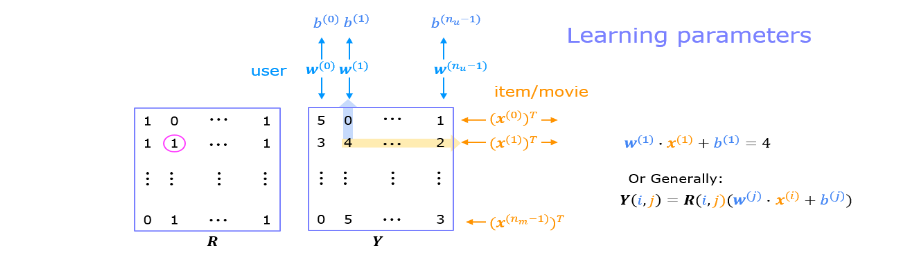

#### 3.3.2.4 Cost Function


The collaborative filtering cost function is given by
$$J({\mathbf{x}^{(0)},...,\mathbf{x}^{(n_m-1)},\mathbf{w}^{(0)},b^{(0)},...,\mathbf{w}^{(n_u-1)},b^{(n_u-1)}})= \left[ \frac{1}{2}\sum_{(i,j):r(i,j)=1}(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2 \right]
+ \underbrace{\left[
\frac{\lambda}{2}
\sum_{j=0}^{n_u-1}\sum_{k=0}^{n-1}(\mathbf{w}^{(j)}_k)^2
+ \frac{\lambda}{2}\sum_{i=0}^{n_m-1}\sum_{k=0}^{n-1}(\mathbf{x}_k^{(i)})^2
\right]}_{regularization}
$$
The first summation in (1) is "for all $i$, $j$ where $r(i,j)$ equals $1$" and could be written:

$$
= \left[ \frac{1}{2}\sum_{j=0}^{n_u-1} \sum_{i=0}^{n_m-1}r(i,j)*(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2 \right]
+\text{regularization}
$$


In [ ]:
#Loop based Cost function
def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    nm, nu = Y.shape
    J = 0
    for j in range(nu):
        w = W[j,:]
        b_j = b[0,j]
        for i in range(nm):
            x = X[i,:]
            y = Y[i,j]
            r = R[i,j]
            J += np.square(r * (np.dot(w,x) + b_j - y ) )

    J = J/2
    J += (lambda_/2) * (np.sum(np.square(W)) + np.sum(np.square(X)))
    return J

In [ ]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

#### 3.3.2.5 Mean Normalization

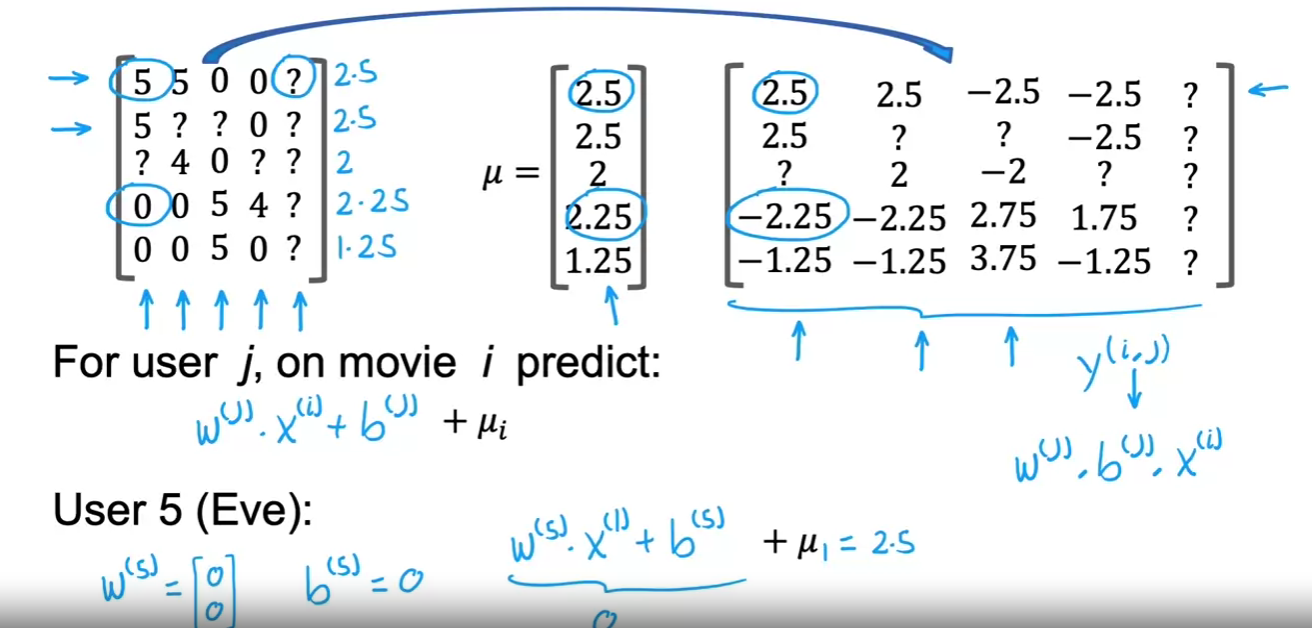


#### 3.3.2.6 TensorFlow Implementation

#### 3.3.2.7 Finding the Rated Items

$$distance \ = \ \sum_{k = 0}^{no\ features}||\ X_{l}^{k}-X_{i}^{k}\ ||^2$$ <br>
Where $X_{i}^k$ is the $k^{th}$ feature of Currently selected $i^{th}$ movie. The equation returns the sort distance of $l^{th}$ movie from  selected $i^{th}$ movie.

#### 3.3.2.8 Limitations

|   Problem Name     |   Brief Explanation   |   Solutions   |
|-----------------------|-------------------------|-------------------|
| Cold Start Problem   | Difficulty in providing recommendations for new users or items with limited data | - Use content-based filtering to provide recommendations based on item attributes or user profiles<br>- Employ hybrid approaches combining Collaborative Filtering with content-based or knowledge-based methods |
| Sparsity                    | Sparse user-item matrices with limited user-item overlaps | - Apply matrix factorization techniques to fill in missing values and reduce sparsity<br>- Use dimensionality reduction techniques like Singular Value Decomposition (SVD) or Non-negative Matrix Factorization (NMF) |
| Scalability                | Increased computational complexity with a large number of users and items | - Utilize parallel computing techniques and distributed systems to handle large-scale datasets<br>- Employ dimensionality reduction techniques to reduce the dimensionality of the user-item matrix |
| Limited Domain Knowledge | Lack of incorporation of contextual information or domain knowledge | - Combine Collaborative Filtering with content-based filtering to consider item attributes or user demographics<br>- Utilize hybrid models that incorporate both Collaborative Filtering and other recommendation techniques |
| Data Quality and Noise | Reliance on subjective or noisy user ratings | - Apply data preprocessing techniques to handle outliers, missing values, or inconsistent ratings<br>- Use robust similarity measures that are less sensitive to noisy data |
| Cold Start for New Items | Difficulty in recommending new items without historical data | - Utilize content-based filtering to make initial recommendations based on item attributes or descriptions<br>- Employ popularity-based recommendations until sufficient user-item interactions are available |

